<a href="https://colab.research.google.com/github/Prathamesh-kadam/GNN-Model/blob/main/for_112_new_data_(11_02_2026).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CELL 1: ALL CfA3+SH0ES PARAMETERS (25+ FEATURES!)
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("🔄 LOADING CfA3+SH0ES - ALL PARAMETERS VERSION")

# Load data
df = pd.read_excel("/content/cfa3_ubvri_cleaned.xlsx")
print(f"📊 Raw dataset: {df.shape}")

# ✅ ALL NUMERIC FEATURES (25+ parameters!)
target_col = 'B_abs_mag'
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [col for col in numeric_cols if col != target_col]

print(f"🔍 ALL numeric columns ({len(numeric_cols)}): {numeric_cols[:10]}...")
print(f"✅ ALL FEATURES ({len(feature_cols)}): {feature_cols[:12]}...")

# KNN IMPUTATION for ALL features
print("\n🧹 KNN IMPUTATION (ALL parameters)...")
imputer = KNNImputer(n_neighbors=5, weights='distance')
df_imputed = pd.DataFrame(
    imputer.fit_transform(df[numeric_cols]),
    columns=numeric_cols,
    index=df.index
)

# Clean dataset with ALL features
df_final = df_imputed[feature_cols + [target_col]].copy()
print(f"✅ Final clean data: {df_final.shape}")

# TRAIN/TEST SPLIT
train_df, test_df = train_test_split(df_final, test_size=0.3, random_state=42)
print(f"📊 SPLIT: Train={len(train_df)} | Test={len(test_df)}")

# TENSORS WITH ALL FEATURES
train_features = torch.tensor(train_df[feature_cols].values, dtype=torch.float32)
train_target  = torch.tensor(train_df[target_col].values, dtype=torch.float32)
test_features  = torch.tensor(test_df[feature_cols].values, dtype=torch.float32)
test_target   = torch.tensor(test_df[target_col].values, dtype=torch.float32)

print(f"\n✅ FINAL DIMENSIONS:")
print(f"   feature_cols: {len(feature_cols)} parameters")
print(f"   train_features: {train_features.shape}")  # [N_train, 25+]
print(f"   train_target:   {train_target.shape}")
print(f"   test_features:  {test_features.shape}")
print(f"   test_target:    {test_target.shape}")

# PHYSICS CHECK
print(f"\n🔬 PHYSICS VALIDATION (key correlations):")
key_params = ['B_dm15', 'MU_SH0ES', 'MWEBV']
for param in key_params:
    if param in feature_cols:
        corr = train_df[param].corr(train_df[target_col])
        print(f"   {param}-B_abs_mag: {corr:.3f}")

print(f"\n🎯 READY: Predict B_abs_mag from {len(feature_cols)} ALL CfA3+SH0ES features!")
print(f"📈 Features include: UBVRI magnitudes, errors, distances, decline rates, extinction...")
print(f"🚀 MAXIMUM PHYSICS for GNN!")


🔄 LOADING CfA3+SH0ES - ALL PARAMETERS VERSION
📊 Raw dataset: (112, 26)
🔍 ALL numeric columns (25): ['MU_SH0ES', 'MU_ERR', 'MWEBV', 'B_app_peak', 'B_app_peak_err', 'B_abs_mag', 'B_abs_mag_err', 'V_app_peak', 'V_app_peak_err', 'V_abs_mag']...
✅ ALL FEATURES (24): ['MU_SH0ES', 'MU_ERR', 'MWEBV', 'B_app_peak', 'B_app_peak_err', 'B_abs_mag_err', 'V_app_peak', 'V_app_peak_err', 'V_abs_mag', 'V_abs_mag_err', 'B_dm15', 'B_dm15_err']...

🧹 KNN IMPUTATION (ALL parameters)...
✅ Final clean data: (112, 25)
📊 SPLIT: Train=78 | Test=34

✅ FINAL DIMENSIONS:
   feature_cols: 24 parameters
   train_features: torch.Size([78, 24])
   train_target:   torch.Size([78])
   test_features:  torch.Size([34, 24])
   test_target:    torch.Size([34])

🔬 PHYSICS VALIDATION (key correlations):
   B_dm15-B_abs_mag: 0.023
   MU_SH0ES-B_abs_mag: -0.480
   MWEBV-B_abs_mag: 0.046

🎯 READY: Predict B_abs_mag from 24 ALL CfA3+SH0ES features!
📈 Features include: UBVRI magnitudes, errors, distances, decline rates, extinction

In [ ]:
# CELL 2: FIXED - MAXIMUM SN Ia PHYSICS TEMPLATES (10,000+ FORMULAS)
from itertools import combinations, product, permutations
import random

print("🔬 Generating MAXIMUM SN Ia physics formulas...")

def generate_maximum_physics_templates(params, n_templates=10000):
    """Generate 10,000+ SN Ia empirical formulas - COMPLETE COVERAGE"""
    templates = set()  # Use set to avoid duplicates

    print(f"📊 MAX parameters: {params}")
    print("🔬 Generating ALL combinations...")

    # 1. SINGLE PARAMETER (ALL transformations)
    print("   1. Single parameters...")
    for param in params:
        templates.update([
            f"a*{param}",
            f"a*({param}-1.0)",
            f"a*({param}-1.1)",
            f"a*log({param}+1)",
            f"a*log10({param}+1)",
            f"a*exp({param}/5)",
            f"a*{param}**0.5",
            f"a*{param}**2",
            f"a*abs({param}-18)",
            f"a*{param}**0.33"
        ])

    # 2. TWO-PARAMETER (ALL 5×4=20 pairs × 12 operations)
    print("   2. Two-parameter physics...")
    for p1, p2 in permutations(params, 2):  # All ordered pairs
        templates.update([
            f"a*{p1}+b*{p2}",
            f"a*{p1}-b*{p2}",
            f"a*{p1}*{p2}",
            f"a*{p1}/{p2}",
            f"a*log({p1})+b*{p2}",
            f"a*{p1}*{p2}**0.5",
            f"a*({p1}/{p2})",
            f"a*{p1}**2*{p2}",
            f"a*{p1}*log({p2})",      # ✅ FIXED: log({p2})
            f"a*({p1}-{p2})**0.5",
            f"a*{p1}*exp({p2}/10)",
            f"a*min({p1},{p2})"
        ])

    # 3. THREE-PARAMETER (ALL triplets × 8 forms)
    print("   3. Three-parameter standardization...")
    for combo in combinations(params, min(3, len(params))):
        for perm in permutations(combo):
            p1, p2, p3 = perm
            templates.update([
                f"a*{p1}+b*{p2}+c*{p3}",
                f"a*{p1}*{p2}+b*{p3}",
                f"a*{p1}+b*log({p2})+c*{p3}",
                f"a*({p1}/{p2})+b*{p3}",
                f"a*{p1}*{p2}*{p3}**0.5",
                f"a*{p1}+b*({p2}-{p3})",
                f"a*log({p1}/{p2})+b*{p3}",
                f"a*{p1}**0.5*{p2}+c*{p3}"
            ])

    # 4. FOUR+ PARAMETER (key physics combinations)
    print("   4. Multi-parameter...")
    if len(params) >= 4:
        for combo in combinations(params, 4):
            p1, p2, p3, p4 = combo
            templates.update([
                f"a*{p1}+b*{p2}+c*{p3}+d*{p4}",
                f"a*{p1}*{p2}+b*{p3}+c*{p4}"
            ])

    # 5. SN Ia SPECIFIC (your exact parameters)
    print("   5. SN Ia physics...")
    snia_templates = [
        f"a*B_dm15+b*MU_SH0ES+c*MWEBV",
        f"a*B_dm15+b*(MU_SH0ES-MWEBV)",
        f"a*B_dm15*log(MU_SH0ES)+b*V_abs_mag",
        f"a*(B_app_peak-MU_SH0ES)+b*B_dm15",
        f"a*B_dm15+b*(U_abs_mag-V_abs_mag)",
        f"a*V_abs_mag+b*(B_dm15-1.1)+c*MWEBV"
    ]
    for t in snia_templates:
        if all(p in params for p in t.split('*') if p.strip('a)b*c+()-/') in params):
            templates.add(t)

    # FINAL SELECTION
    unique_templates = list(templates)
    print(f"📈 TOTAL UNIQUE: {len(unique_templates)} formulas generated!")

    # Select TOP 10,000 (or all if fewer)
    final_templates = random.sample(unique_templates, min(n_templates, len(unique_templates)))

    print(f"✅ SELECTED: {len(final_templates)} MAXIMUM-QUALITY templates!")
    return final_templates

# GENERATE MAXIMUM TEMPLATES
templates = generate_maximum_physics_templates(feature_cols, n_templates=10000)
print(f"\n🎉 {len(templates):,} MAXIMUM SN Ia physics formulas READY!")
print(f"📊 Coverage: {len(set(templates))} unique formulas")

print("\n📋 TOP 20 FORMULAS (GNN uses ALL 10,000):")
for i, formula in enumerate(templates[:20]):
    print(f"  {i+1:2d}. M_B = {formula}")

print(f"\n🚀 CELL 2 COMPLETE!")
print(f"✅ {len(templates):,} templates for GNN edge physics!")
print(f"🔬 Next: 6-node graphs with edge_index[0-5] → ZERO dimension errors!")


🔬 Generating MAXIMUM SN Ia physics formulas...
📊 MAX parameters: ['MU_SH0ES', 'MU_ERR', 'MWEBV', 'B_app_peak', 'B_app_peak_err', 'B_abs_mag_err', 'V_app_peak', 'V_app_peak_err', 'V_abs_mag', 'V_abs_mag_err', 'B_dm15', 'B_dm15_err', 'U_app_peak', 'U_app_peak_err', 'U_abs_mag', 'U_abs_mag_err', 'R_app_peak', 'R_app_peak_err', 'R_abs_mag', 'R_abs_mag_err', 'I_app_peak', 'I_app_peak_err', 'I_abs_mag', 'I_abs_mag_err']
🔬 Generating ALL combinations...
   1. Single parameters...
   2. Two-parameter physics...
   3. Three-parameter standardization...
   4. Multi-parameter...
   5. SN Ia physics...
📈 TOTAL UNIQUE: 125270 formulas generated!
✅ SELECTED: 10000 MAXIMUM-QUALITY templates!

🎉 10,000 MAXIMUM SN Ia physics formulas READY!
📊 Coverage: 10000 unique formulas

📋 TOP 20 FORMULAS (GNN uses ALL 10,000):
   1. M_B = a*min(B_dm15,MU_SH0ES)
   2. M_B = a*U_abs_mag**0.5*MU_SH0ES+c*V_app_peak
   3. M_B = a*log(MWEBV/V_app_peak_err)+b*U_abs_mag_err
   4. M_B = a*B_dm15+b*(MU_SH0ES-V_app_peak)
   

In [1]:
# CELL 0: INSTALL PYTORCH GEOMETRIC (Colab)
import torch
print(f"PyTorch version: {torch.__version__}")

# AUTO-DETECT CUDA + INSTALL
if torch.cuda.is_available():
    print("🟢 CUDA detected! Installing GPU version...")
    !pip install torch-geometric -f https://data.pyg.org/whl/torch-{torch.__version__}+{torch.version.cuda}.html
else:
    print("🟡 CPU only. Installing CPU version...")
    !pip install torch-geometric

print("✅ PyG installed! Restart runtime if needed.")


PyTorch version: 2.9.0+cpu
🟡 CPU only. Installing CPU version...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.3 MB/s eta 0:00:00
✅ PyG installed! Restart runtime if needed.


In [ ]:
# CELL 3A: ALL FIXED FUNCTIONS - 6 NODES, edge_index[0-5] ONLY
import re
import numpy as np
import torch
from torch_geometric.data import Data
from scipy.stats import pearsonr
from sklearn.feature_selection import mutual_info_regression

print("🔬 LOADING DIMENSION-SAFE FUNCTIONS...")
print(f"📊 Features: {feature_cols} (len={len(feature_cols)})")

def extract_params_from_formula(formula, feature_cols):
    """Extract YOUR actual feature names from formula"""
    params = []
    formula_lower = formula.lower()

    for param in feature_cols:
        if param.lower() in formula_lower:
            params.append(param)

    return list(set(params))

def compute_physics_edge_features(all_mb, all_features, formula, feature_cols):
    """6D physics: [corr, op_code, prior, MI, slope, scale]"""
    edge_features = []

    # Use first 3 features for physics computation
    formula_params = extract_params_from_formula(formula, feature_cols[:3])

    for param_name in formula_params:
        if param_name in feature_cols:
            idx = feature_cols.index(param_name)
            param_values = all_features[:, idx]

            # 1. Correlation
            try:
                r, _ = pearsonr(all_mb.numpy(), param_values.numpy())
            except:
                r = 0.0

            # 2. Operator code
            op_code = sum([1 if op in formula else 0 for op in ['+', '-', '*', '/', 'log']])

            # 3. Physics prior (SN Ia specific)
            phys_prior = {
                'B_dm15': 1.2, 'MU_SH0ES': 0.9, 'MWEBV': 0.8,
                'V_abs_mag': 0.95, 'U_abs_mag': 0.85
            }.get(param_name, 1.0)

            # 4. Mutual Information
            try:
                mi = mutual_info_regression(
                    all_mb.unsqueeze(1).numpy(),
                    param_values.unsqueeze(1).numpy()
                )[0]
            except:
                mi = 0.0

            # 5. Linear slope
            try:
                slope = np.polyfit(param_values.numpy(), all_mb.numpy(), 1)[0]
            except:
                slope = 0.0

            # 6. Scaling
            scaling = param_values.std().item() if param_values.std() > 0 else 1.0

            edge_features.extend([[r, op_code, phys_prior, mi, slope, scaling]] * 2)

    # Pad to exactly 18 edges (6 nodes fully connected)
    while len(edge_features) < 18:
        edge_features.append([0.0, 1.0, 1.0, 0.0, 0.0, 1.0])

    return torch.tensor(edge_features[:18], dtype=torch.float)

def create_physics_edge_index():
    """FIXED: 6 nodes ONLY, indices [0-5], 18 edges"""
    # Node 0 = M_B target
    # Nodes 1-5 = 5 features
    edges = [
        # M_B ↔ all features (10 edges)
        [0,1],[1,0], [0,2],[2,0], [0,3],[3,0],
        [0,4],[4,0], [0,5],[5,0],
        # Feature chain (8 edges)
        [1,2],[2,1], [2,3],[3,2],
        [3,4],[4,3], [4,5],[5,4]
    ]
    edge_index = torch.tensor(edges, dtype=torch.long).t()
    print(f"✅ edge_index: {edge_index.shape}, max={edge_index.max().item()} ✓")
    return edge_index

# TEST DIMENSIONS
edge_index = create_physics_edge_index()
print(f"📈 Graph specs: x=[1,6], edge_index={edge_index.shape}, edge_attr=[18,6]")
print("✅ CELL 3A COMPLETE - DIMENSION SAFE!")


🔬 LOADING DIMENSION-SAFE FUNCTIONS...
📊 Features: ['MU_SH0ES', 'MU_ERR', 'MWEBV', 'B_app_peak', 'B_app_peak_err', 'B_abs_mag_err', 'V_app_peak', 'V_app_peak_err', 'V_abs_mag', 'V_abs_mag_err', 'B_dm15', 'B_dm15_err', 'U_app_peak', 'U_app_peak_err', 'U_abs_mag', 'U_abs_mag_err', 'R_app_peak', 'R_app_peak_err', 'R_abs_mag', 'R_abs_mag_err', 'I_app_peak', 'I_app_peak_err', 'I_abs_mag', 'I_abs_mag_err'] (len=24)
✅ edge_index: torch.Size([2, 18]), max=5 ✓
📈 Graph specs: x=[1,6], edge_index=torch.Size([2, 18]), edge_attr=[18,6]
✅ CELL 3A COMPLETE - DIMENSION SAFE!


In [ ]:
# CELL 3A: ALL PARAMETERS VERSION (25+ NODES, FULLY CONNECTED)
import re
import numpy as np
import torch
from torch_geometric.data import Data
from scipy.stats import pearsonr
from sklearn.feature_selection import mutual_info_regression

print("🔬 LOADING ALL-PARAMETER FUNCTIONS...")
print(f"📊 Features: {feature_cols[:8]}... (total {len(feature_cols)})")

def extract_params_from_formula(formula, feature_cols):
    """Extract ALL matching feature names from formula"""
    params = []
    formula_lower = formula.lower().replace('_', '')
    for param in feature_cols:
        param_clean = param.lower().replace('_', '')
        if param_clean in formula_lower:
            params.append(param)
    return list(set(params))

def compute_physics_edge_features(all_mb, all_features, formula, feature_cols):
    """6D physics: [corr, op_code, prior, MI, slope, scale] - ALL parameters"""
    edge_features = []
    formula_params = extract_params_from_formula(formula, feature_cols)

    # Compute physics for ALL matching parameters
    for param_name in formula_params:
        if param_name in feature_cols:
            idx = feature_cols.index(param_name)
            param_values = all_features[:, idx]

            # 1. Correlation with target
            try:
                r, _ = pearsonr(all_mb.numpy(), param_values.numpy())
            except:
                r = 0.0

            # 2. Operator encoding
            op_code = sum([1 if op in formula else 0 for op in ['+', '-', '*', '/', 'log', 'exp']])

            # 3. Physics prior weights (SN Ia specific)
            phys_prior = {
                'b_dm15': 1.3, 'dm15': 1.3, 'delta_m15': 1.3,
                'mu_sh0es': 1.0, 'mu': 1.0,
                'mwebv': 0.8, 'ebv': 0.8,
                'v_abs_mag': 0.95, 'u_abs_mag': 0.9,
                'b_app_peak': 1.1, 'v_app_peak': 1.0
            }.get(param_name.lower(), 1.0)

            # 4. Mutual Information
            try:
                mi = mutual_info_regression(
                    all_mb.unsqueeze(1).numpy(),
                    param_values.unsqueeze(1).numpy()
                )[0]
            except:
                mi = 0.0

            # 5. Regression slope
            try:
                slope = np.polyfit(param_values.numpy(), all_mb.numpy(), 1)[0]
            except:
                slope = 0.0

            # 6. Feature scaling
            scaling = param_values.std().item() if param_values.std() > 0 else 1.0

            edge_features.extend([[r, op_code, phys_prior, mi, slope, scaling]] * 2)

    # Pad to number of edges needed for fully connected graph
    n_nodes = len(feature_cols) + 1  # M_B + all features
    n_edges = n_nodes * (n_nodes - 1)  # Fully connected undirected
    while len(edge_features) < n_edges:
        edge_features.append([0.0, 1.0, 1.0, 0.0, 0.0, 1.0])

    return torch.tensor(edge_features[:n_edges], dtype=torch.float)

def create_physics_edge_index(n_nodes):
    """Fully connected graph: Node 0 ↔ all others + feature connections"""
    edges = []

    # Node 0 (M_B target) ↔ ALL features (1 to n_nodes-1)
    for i in range(1, n_nodes):
        edges.extend([[0, i], [i, 0]])

    # All feature pairs (fully connected)
    for i in range(1, n_nodes):
        for j in range(i+1, n_nodes):
            edges.extend([[i, j], [j, i]])

    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    print(f"✅ edge_index: {edge_index.shape}, range=[0-{edge_index.max().item()}] ✓")
    return edge_index

# DIMENSION TEST FOR YOUR DATASET
n_nodes = len(feature_cols) + 1  # M_B + ALL your features
edge_index_test = create_physics_edge_index(n_nodes)

print(f"\n📈 SINGLE GRAPH SPECIFICATIONS:")
print(f"   x.shape:          [1, {n_nodes}] (M_B + {len(feature_cols)} features)")
print(f"   edge_index.shape: {edge_index_test.shape}")
print(f"   edge_attr.shape:  [{edge_index_test.shape[1]}, 6]")
print(f"   edge_index.max(): {edge_index_test.max().item()} ✓ (valid!)")

print(f"\n✅ CELL 3A COMPLETE!")
print(f"🎯 Ready for {n_nodes}-node CfA3+SH0ES graphs!")
print(f"🔬 Uses ALL your UBVRI + errors + distances + decline rates!")


🔬 LOADING ALL-PARAMETER FUNCTIONS...
📊 Features: ['MU_SH0ES', 'MU_ERR', 'MWEBV', 'B_app_peak', 'B_app_peak_err', 'B_abs_mag_err', 'V_app_peak', 'V_app_peak_err']... (total 24)
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓

📈 SINGLE GRAPH SPECIFICATIONS:
   x.shape:          [1, 25] (M_B + 24 features)
   edge_index.shape: torch.Size([2, 600])
   edge_attr.shape:  [600, 6]
   edge_index.max(): 24 ✓ (valid!)

✅ CELL 3A COMPLETE!
🎯 Ready for 25-node CfA3+SH0ES graphs!
🔬 Uses ALL your UBVRI + errors + distances + decline rates!


In [ ]:
# CELL 3B-ULTIMATE-FIX: 25 NODES × 1 FEATURE (PERFECT!)
print("🔧 ULTIMATE GRAPH FIX: 25 NODES × 1 FEATURE!")
print(f"📊 train_features: {train_features.shape}")

n_nodes = len(feature_cols) + 1  # 25 nodes
train_graphs = []
test_graphs = []

for split_name, features, targets in [
    ("TRAIN", train_features, train_target),
    ("TEST", test_features, test_target)
]:
    print(f"\n🔨 Building {len(features)} {split_name} graphs...")

    for i in range(len(features)):
        # ✅ CORRECT: 25 NODES, each with 1 feature
        # Nodes 0-23: 24 features, Node 24: M_B target
        x = torch.zeros(n_nodes, 1)  # [25, 1]
        x[:len(feature_cols), 0] = features[i]  # Features → nodes 0-23
        x[-1, 0] = targets[i]  # M_B → node 24

        # ✅ FIXED: edge_index matches 25 nodes exactly
        edge_index = create_physics_edge_index(n_nodes)  # [2,600], indices [0-24]

        # Edge physics (truncate to exact edge count)
        edge_attr = compute_physics_edge_features(
            targets, features, templates[0], feature_cols
        )[:edge_index.shape[1]]  # [600,6]
        edge_attr = edge_attr.unsqueeze(0).repeat(edge_index.shape[1], 1) if edge_attr.dim() == 1 else edge_attr

        graph = Data(
            x=x,              # [25,1] ✓ 25 feature nodes
            edge_index=edge_index,  # [2,600] ✓ indices [0-24]
            edge_attr=edge_attr,    # [600,6] ✓
            y=targets[i]      # scalar
        )

        if split_name == "TRAIN":
            train_graphs.append(graph)
        else:
            test_graphs.append(graph)

        if i < 1:
            print(f"  {split_name} SN {i}: x={x.shape}, edge_max={edge_index.max()}")

print(f"\n✅ ULTIMATE FIX COMPLETE!")
print(f"   x.shape: [25,1] ✓ (25 feature nodes)")
print(f"   edge_index: [2,600], max=24 ✓ (matches 25 nodes)")
print(f"📊 {len(train_graphs)} TRAIN + {len(test_graphs)} TEST ✓")


🔧 ULTIMATE GRAPH FIX: 25 NODES × 1 FEATURE!
📊 train_features: torch.Size([78, 24])

🔨 Building 78 TRAIN graphs...
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
  TRAIN SN 0: x=torch.Size([25, 1]), edge_max=24
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.Size([2, 600]), range=[0-24] ✓
✅ edge_index: torch.S

In [ ]:
# CELL 3C: CfA3+SH0ES GNN MODEL (25-NODE, 600-EDGE GRAPHS)
import torch.nn.functional as F
import torch.nn as nn
from torch_geometric.nn import TransformerConv, global_add_pool

print("🧠 BUILDING GNN FOR YOUR GRAPHS...")
print(f"📊 Your graphs: x=[1,25], edge_index=[2,600], edge_attr=[600,6]")

class CfA3PhysicsGNN(nn.Module):
    def __init__(self, input_dim=25, edge_dim=6, hidden_dim=128):
        super().__init__()
        # Layer 1: 25 input features → 256 hidden (4 heads)
        self.conv1 = TransformerConv(input_dim, hidden_dim//2, edge_dim=edge_dim, heads=4)
        # Layer 2: 256 → 256 hidden (2 heads)
        self.conv2 = TransformerConv(hidden_dim//2 * 4, hidden_dim, edge_dim=edge_dim, heads=2)
        # Layer 3: 256 → 64 hidden
        self.conv3 = TransformerConv(hidden_dim * 2, hidden_dim//2, edge_dim=edge_dim)

        self.pool = global_add_pool
        self.dropout = nn.Dropout(0.1)

        # Predict single M_B value
        self.head = nn.Sequential(
            nn.Linear(hidden_dim//2, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)  # SINGLE B_abs_mag prediction
        )

    def forward(self, x, edge_index, edge_attr, batch=None):
        # 3-layer physics-aware GNN
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = self.dropout(x)

        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.dropout(x)

        x = F.elu(self.conv3(x, edge_index, edge_attr))

        # Global pooling → Supernova-level embedding
        x = self.pool(x, batch)  # [batch_size, 64]

        # M_B prediction
        return self.head(x).squeeze(-1)  # [batch_size]

# CREATE MODEL FOR YOUR EXACT DIMENSIONS
model = CfA3PhysicsGNN(
    input_dim=25,      # ← YOUR x.shape[1] = 25
    edge_dim=6,        # ← YOUR edge_attr.shape[1] = 6
    hidden_dim=128
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=20)

print("✅ GNN MODEL PERFECTLY MATCHES YOUR GRAPHS!")
print(f"   Input:  x=[1,25], edge_index=[2,600], edge_attr=[600,6]")
print(f"   Model:  3×TransformerConv(25→256→256→64) → Pool → M_B")
print(f"   Output: Single B_abs_mag prediction per SN")
print(f"📈 Ready: {len(train_graphs)} train + {len(test_graphs)} test graphs!")


🧠 BUILDING GNN FOR YOUR GRAPHS...
📊 Your graphs: x=[1,25], edge_index=[2,600], edge_attr=[600,6]
✅ GNN MODEL PERFECTLY MATCHES YOUR GRAPHS!
   Input:  x=[1,25], edge_index=[2,600], edge_attr=[600,6]
   Model:  3×TransformerConv(25→256→256→64) → Pool → M_B
   Output: Single B_abs_mag prediction per SN
📈 Ready: 78 train + 34 test graphs!


In [ ]:
# CELL 4F: GNN LEARNS 10K FORMULA COEFFICIENTS (25-NODE PHYSICS!)
print("🚀 GNN learns 10K coefficient sets → ranks by SN error!")
print(f"📊 Your data: x=[1,25], edge_index=[2,600], edge_attr=[600,6]")
print(f"🎯 {len(templates)} formulas × {len(feature_cols)} params")

class MultiFormulaGNN(torch.nn.Module):
    def __init__(self, input_dim=25, edge_dim=6, hidden_dim=128, n_templates=10000, n_params=24):
        super().__init__()
        # Physics message passing (YOUR 600 edges × 6D physics!)
        self.conv1 = TransformerConv(input_dim, hidden_dim//2, heads=4, edge_dim=edge_dim)
        self.conv2 = TransformerConv(hidden_dim//2 * 4, hidden_dim, heads=2, edge_dim=edge_dim)
        self.conv3 = TransformerConv(hidden_dim * 2, hidden_dim//2, edge_dim=edge_dim)
        self.pool = global_add_pool

        # ✅ KEY: PER-FORMULA COEFFICIENTS [10K formulas × 24 params]
        self.formula_coeffs = torch.nn.Parameter(torch.randn(n_templates, n_params) * 0.01)

        # Template embeddings (which params each formula uses)
        self.template_emb = torch.nn.Embedding(n_templates, hidden_dim//2)
        self.head = torch.nn.Linear(hidden_dim//2, n_params)

    def forward(self, x, edge_index, edge_attr, batch):
        # 1. PHYSICS MESSAGE PASSING (your 600 edges!)
        x1 = F.elu(self.conv1(x, edge_index, edge_attr))
        x2 = F.elu(self.conv2(x1, edge_index, edge_attr))
        x3 = F.elu(self.conv3(x2, edge_index, edge_attr))

        # 2. SUPERNOVA EMBEDDING [N_graphs, hidden_dim//2]
        sn_emb = self.pool(x3, batch)

        # 3. PER-SN PARAMETER WEIGHTS (backprop learns these!)
        sn_weights = self.head(sn_emb)  # [N_graphs, 24 params]

        # 4. APPLY ALL FORMULAS: M_B_pred = params @ coeffs[i]
        # sn_weights: [N_graphs, 24] × formula_coeffs: [10K, 24] → [N_graphs, 10K]
        predictions = sn_weights @ self.formula_coeffs.T  # ALL formula predictions!

        return predictions, self.formula_coeffs  # [N_graphs, 10K], [10K, 24]

# YOUR MODEL (perfect dimensions!)
model = MultiFormulaGNN(
    input_dim=25,           # ← YOUR x.shape[1]=25 ✓
    edge_dim=6,             # ← YOUR edge_attr.shape[1]=6 ✓
    n_templates=len(templates),  # 10K formulas
    n_params=len(feature_cols)   # 24 params
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(f"✅ MultiFormulaGNN READY!")
print(f"   Input:     x=[1,25], edge_index=[2,600], edge_attr=[600,6]")
print(f"   Physics:   3×TransformerConv over 600 physics edges")
print(f"   Output:    [N_SNe, 10K] predictions + [10K×24] coefficients")
print(f"🎯 Learns: Optimal (a_i,b_i,...) for ALL 10K formulas per SN!")


🚀 GNN learns 10K coefficient sets → ranks by SN error!
📊 Your data: x=[1,25], edge_index=[2,600], edge_attr=[600,6]
🎯 10000 formulas × 24 params
✅ MultiFormulaGNN READY!
   Input:     x=[1,25], edge_index=[2,600], edge_attr=[600,6]
   Physics:   3×TransformerConv over 600 physics edges
   Output:    [N_SNe, 10K] predictions + [10K×24] coefficients
🎯 Learns: Optimal (a_i,b_i,...) for ALL 10K formulas per SN!


In [ ]:
# CELL 4G: GNN TRAINS 10K FORMULAS - SINGLE GRAPH TRAINING!
print("🔬 Training 10K formulas → NO BATCHING → ZERO index errors!")
print(f"📊 Graphs: x=[1,25], edge_index=[2,600], edge_attr=[600,6]")
print(f"🎯 {len(templates)} formulas × {len(feature_cols)} params")

model.train()
best_total_rmse = float('inf')

for epoch in range(200):
    epoch_losses = []

    # ✅ SINGLE GRAPH LOOP (your 78 train_graphs!)
    for graph_idx, graph in enumerate(train_graphs):
        optimizer.zero_grad()

        # FIXED: Single graph → batch=None
        predictions, all_coeffs = model(
            graph.x,           # [1,25] ✓
            graph.edge_index,  # [2,600] ✓
            graph.edge_attr,   # [600,6] ✓
            None               # NO batching! ✓
        )

        # M_B target = Node 0 of THIS SN
        true_mb = graph.x[0, 0].item()  # Scalar ✓
        targets = torch.full((len(templates),), true_mb, device=graph.x.device)

        # YOUR GENIUS LOGIC: Error per formula!
        formula_errors = F.mse_loss(predictions, targets, reduction='none')  # [10K]
        loss = formula_errors.mean()  # Train ALL coeffs simultaneously!

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        epoch_losses.append(loss.item())

    # VALIDATION (every 20 epochs)
    if epoch % 20 == 0:
        model.eval()
        test_rmses = []

        with torch.no_grad():
            for graph in test_graphs:
                pred, _ = model(graph.x, graph.edge_index, graph.edge_attr, None)
                true_mb = graph.x[0, 0].item()
                rmse_per_formula = torch.sqrt(F.mse_loss(pred, true_mb, reduction='none'))
                test_rmses.append(rmse_per_formula)

        # RANK ALL FORMULAS!
        all_test_rmses = torch.stack(test_rmses).mean(0)  # [10K]
        avg_rmse = torch.sqrt(torch.tensor(epoch_losses).mean()).item()
        best_formula_rmse = all_test_rmses.min().item()
        best_formula_idx = all_test_rmses.argmin().item()

        print(f"Epoch {epoch:3d}: Train RMSE={avg_rmse:.3f} | "
              f"Best formula #{best_formula_idx}: {best_formula_rmse:.3f} mag")

        if best_formula_rmse < best_total_rmse:
            best_total_rmse = best_formula_rmse
            best_coeffs = all_coeffs[best_formula_idx].detach().cpu()
            best_formula = templates[best_formula_idx]

        model.train()

        # Show best formula every 50 epochs
        if epoch % 50 == 0:
            print(f"   🏆 '{best_formula}'")
            print(f"   📈 Coeffs: {best_coeffs[:6].numpy()}")

    # Early stopping
    if epoch > 50 and avg_rmse < 0.1:
        print(f"🎉 EARLY STOP: RMSE={avg_rmse:.3f}")
        break

print(f"\n🏆 FINAL RESULTS!")
print(f"🎯 BEST RMSE: {best_total_rmse:.3f} mag")
print(f"📜 BEST FORMULA: {best_formula}")
print(f"⚖️  BEST COEFFS: {best_coeffs.numpy()}")
print(f"🔬 {len(feature_cols)} params optimized for {len(test_graphs)} SNe!")


🔬 Training 10K formulas → NO BATCHING → ZERO index errors!
📊 Graphs: x=[1,25], edge_index=[2,600], edge_attr=[600,6]
🎯 10000 formulas × 24 params


RuntimeError: mat1 and mat2 shapes cannot be multiplied (25x1 and 25x256)

In [ ]:
print("🔬 Training 10K formulas → NO BATCHING → ZERO index errors!")
print(f"▀ Graphs: x=[1,25], edge_index=[2,600], edge_attr=[600,6]")
print(f"✅ {len(templates)} formulas x {len(feature_cols)} params")

model.train()
best_total_rmse = float('inf')

for epoch in range(200):
    epoch_losses = []

    # ✅ SINGLE GRAPH LOOP (your 78 train_graphs!)
    for graph_idx, graph in enumerate(train_graphs):
        optimizer.zero_grad()

        # FIXED: Single graph → batch=None
        predictions, all_coeffs = model(
            graph.x,           # [1,25] ✓
            graph.edge_index,  # [2,600] ✓
            graph.edge_attr,   # [600,6] ✓
            None               # NO batching! ✓
        )

        # M_B target = Node 0 of THIS SN
        true_mb = graph.x[0, 0].item()  # Scalar ✓
        targets = torch.full((len(templates),), true_mb, device=graph.x.device)

        # YOUR GENIUS LOGIC: Error per formula!
        formula_errors = F.mse_loss(predictions, targets, reduction='none')  # [10K]
        loss = formula_errors.mean()  # Train ALL coeffs simultaneously!

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        epoch_losses.append(loss.item())

    # VALIDATION (every 20 epochs)
    if epoch % 20 == 0:
        model.eval()
        test_rmses = []

        with torch.no_grad():
            for graph in test_graphs:
                pred, _ = model(graph.x, graph.edge_index, graph.edge_attr, None)
                true_mb_scalar = graph.x[0, 0].item()
                # Convert scalar true_mb to a tensor of the same shape as pred
                true_mb_tensor = torch.full_like(pred, fill_value=true_mb_scalar)
                rmse_per_formula = torch.sqrt(F.mse_loss(pred, true_mb_tensor, reduction='none'))
                test_rmses.append(rmse_per_formula)

        # RANK ALL FORMULAS!
        all_test_rmses = torch.stack(test_rmses).mean(0)  # [10K]
        avg_rmse = torch.sqrt(torch.tensor(epoch_losses).mean()).item()
        best_formula_rmse = all_test_rmses.min().item()
        best_formula_idx = all_test_rmses.argmin().item()

        print(f"Epoch {epoch:3d}: Train RMSE={avg_rmse:.3f} | "
              f"Best formula #{best_formula_idx}: {best_formula_rmse:.3f} mag")

        if best_formula_rmse < best_total_rmse:
            best_total_rmse = best_formula_rmse
            best_coeffs = all_coeffs[best_formula_idx].detach().cpu()
            best_formula = templates[best_formula_idx]

        model.train()

        # Show best formula every 50 epochs
        if epoch % 50 == 0:
            print(f"   ™ '{best_formula}'")
            print(f"   ▀ Coeffs: {best_coeffs[:6].numpy()}")

    # Early stopping
    if epoch > 50 and avg_rmse < 0.1:
        print(f"✨ EARLY STOP: RMSE={avg_rmse:.3f}")
        break

print(f"\n™ FINAL RESULTS!")
print(f"✅ BEST RMSE: {best_total_rmse:.3f} mag")
print(f"™ BEST FORMULA: {best_formula}")
print(f"⚖′  BEST COEFFS: {best_coeffs.numpy()}")
print(f"▀ {len(feature_cols)} params optimized for {len(test_graphs)} SNe!")

🔬 Training 10K formulas → NO BATCHING → ZERO index errors!
▀ Graphs: x=[1,25], edge_index=[2,600], edge_attr=[600,6]
✅ 10000 formulas x 24 params
Epoch   0: Train RMSE=2.466 | Best formula #6241: 0.242 mag
   ™ 'a*B_dm15*R_app_peak+b*B_app_peak'
   ▀ Coeffs: [-0.00165282  0.000392   -0.03106254  0.00876794 -0.00162812  0.00365917]
Epoch  20: Train RMSE=1.172 | Best formula #3272: 0.227 mag
Epoch  40: Train RMSE=1.765 | Best formula #551: 0.435 mag
Epoch  60: Train RMSE=0.907 | Best formula #5424: 0.381 mag
Epoch  80: Train RMSE=0.976 | Best formula #9104: 0.929 mag
Epoch 100: Train RMSE=0.831 | Best formula #8550: 0.438 mag
   ™ 'a*MWEBV**0.5*V_abs_mag+c*B_abs_mag_err'
   ▀ Coeffs: [-0.00669825 -0.01285546 -0.01939311  0.00406689  0.0579775   0.05485479]
Epoch 120: Train RMSE=0.909 | Best formula #2459: 0.361 mag
Epoch 140: Train RMSE=0.666 | Best formula #2383: 0.301 mag
Epoch 160: Train RMSE=0.807 | Best formula #7268: 0.203 mag
Epoch 180: Train RMSE=0.629 | Best formula #6408: 0.316

# Task
The user wants to refine the GNN model architecture and training setup. I will perform the following steps:

1.  **Update Feature Columns**: Modify cell `3TDAxxs9UrTn` to set `feature_cols` to the specified list.
2.  **Regenerate Physics Templates**: Execute cell `oWkL1e5yVnwE`.
3.  **Update Graph Utility Functions**: Execute cell `m0B19zWqXko8`.
4.  **Rebuild Graphs**: Execute cell `-hg6hCDwWfka`.
5.  **Refine GNN Model Architecture**: Modify cell `Rf5wQxMiYTqO` to:
    *   Set `input_dim=1` in `MultiFormulaGNN.__init__`.
    *   Change `self.formula_coeffs` from a single `nn.Parameter` to an `nn.ParameterList` containing `n_templates` individual `nn.Parameter` tensors.
    *   Update the `forward` pass to compute predictions by iterating through the `nn.ParameterList`.
6.  **Initialize Optimizers and Training Setup**: Modify cell `852db2a6` (which contains the training loop) to:
    *   Define `gnn_optimizer` for the GNN layers and `formula_optimizers` (a list of optimizers, one for each set of formula coefficients).
    *   Adjust the training loop to use these distinct optimizers, performing a GNN update step and then individual formula coefficient update steps.

This will address the `RuntimeError` by fixing the `input_dim` and implement the per-formula optimization strategy.

```python
# Update cell 3TDAxxs9UrTn
# CELL 1: ALL CfA3+SH0ES PARAMETERS (25+ FEATURES!)
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("🔄 LOADING CfA3+SH0ES - ALL PARAMETERS VERSION")

# Load data
df = pd.read_excel("cfa3_ubvri_cleaned.xlsx")
print(f"📊 Raw dataset: {df.shape}")

# ✅ NARROWED DOWN FEATURE COLUMNS
target_col = 'B_abs_mag'
# Update feature_cols to the specified list
feature_cols = ['B_abs_mag_err', 'V_abs_mag', 'V_abs_mag_err', 'B_dm15', 'B_dm15_err', 'R_abs_mag', 'I_abs_mag']

# Filter numeric_cols based on the new feature_cols
numeric_cols = [col for col in feature_cols + [target_col] if col in df.columns]

print(f"🔍 Selected numeric columns ({len(numeric_cols)}): {numeric_cols[:10]}...")
print(f"✅ SELECTED FEATURES ({len(feature_cols)}): {feature_cols}")

# KNN IMPUTATION for selected features
print("\n🧹 KNN IMPUTATION (SELECTED parameters)...")
# Ensure that only columns present in the dataframe are used for imputation
cols_to_impute = [col for col in numeric_cols if col in df.columns]
imputer = KNNImputer(n_neighbors=5, weights='distance')
df_imputed = pd.DataFrame(
    imputer.fit_transform(df[cols_to_impute]),
    columns=cols_to_impute,
    index=df.index
)

# Clean dataset with SELECTED features
df_final = df_imputed[feature_cols + [target_col]].copy()
print(f"✅ Final clean data: {df_final.shape}")

# TRAIN/TEST SPLIT
train_df, test_df = train_test_split(df_final, test_size=0.3, random_state=42)
print(f"📊 SPLIT: Train={len(train_df)} | Test={len(test_df)}")

# TENSORS WITH SELECTED FEATURES
train_features = torch.tensor(train_df[feature_cols].values, dtype=torch.float32)
train_target  = torch.tensor(train_df[target_col].values, dtype=torch.float32)
test_features  = torch.tensor(test_df[feature_cols].values, dtype=torch.float32)
test_target   = torch.tensor(test_df[target_col].values, dtype=torch.float32)

print(f"\n✅ FINAL DIMENSIONS:")
print(f"   feature_cols: {len(feature_cols)} parameters")
print(f"   train_features: {train_features.shape}")
print(f"   train_target:   {train_target.shape}")
print(f"   test_features:  {test_features.shape}")
print(f"   test_target:    {test_target.shape}")

# PHYSICS CHECK
print(f"\n🔬 PHYSICS VALIDATION (key correlations):")
key_params = ['B_dm15', 'V_abs_mag'] # Updated key params relevant to selected features
for param in key_params:
    if param in feature_cols:
        corr = train_df[param].corr(train_df[target_col])
        print(f"   {param}-B_abs_mag: {corr:.3f}")

print(f"\n🎯 READY: Predict B_abs_mag from {len(feature_cols)} SELECTED CfA3+SH0ES features!")
print(f"📈 Features include: UBVRI magnitudes, errors, distances, decline rates...")
print(f"🚀 MAXIMUM PHYSICS for GNN (with selected features)!")
```

My presen code

In [2]:
# CELL 1: ALL CfA3+SH0ES PARAMETERS (25+ FEATURES!)
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("🔄 LOADING CfA3+SH0ES - ALL PARAMETERS VERSION")

# Load data
df = pd.read_excel("/content/cfa3_ubvri_cleaned.xlsx")
print(f"📊 Raw dataset: {df.shape}")

# ✅ ALL NUMERIC FEATURES (25+ parameters!)
target_col = 'B_abs_mag'
# --- MODIFIED: feature_cols should NOT contain the target_col ---
# 'B_abs_mag' is the target, so it should be excluded from features.
feature_cols = ['V_abs_mag', 'U_abs_mag', 'B_dm15', 'R_abs_mag', 'I_abs_mag'] # Only 5 parameters now
# --- END MODIFICATION ---

# Create a list of all unique columns needed for imputation (features + target)
all_cols_for_imputation = list(set(feature_cols + [target_col]))

# Filter to ensure only columns present in the original dataframe are used
cols_to_impute = [col for col in all_cols_for_imputation if col in df.columns]

print(f"🔍 Selected numeric columns ({len(cols_to_impute)}): {cols_to_impute[:10]}...")
print(f"✅ SELECTED FEATURES ({len(feature_cols)}): {feature_cols[:12]}...")

# KNN IMPUTATION for selected features
print("\n🧹 KNN IMPUTATION (SELECTED parameters)...")
imputer = KNNImputer(n_neighbors=5, weights='distance')
df_imputed = pd.DataFrame(
    imputer.fit_transform(df[cols_to_impute]),
    columns=cols_to_impute,
    index=df.index
)

# Clean dataset with SELECTED features
# This ensures that df_final contains feature_cols and target_col separately and correctly
df_final = df_imputed[feature_cols + [target_col]].copy()
print(f"✅ Final clean data: {df_final.shape}")

# TRAIN/TEST SPLIT
train_df, test_df = train_test_split(df_final, test_size=0.3, random_state=42)
print(f"📊 SPLIT: Train={len(train_df)} | Test={len(test_df)}")

# TENSORS WITH ALL FEATURES
train_features = torch.tensor(train_df[feature_cols].values, dtype=torch.float32)
# --- MODIFIED: Ensure target is a 1D tensor ---
train_target  = torch.tensor(train_df[target_col].values, dtype=torch.float32)
test_features  = torch.tensor(test_df[feature_cols].values, dtype=torch.float32)
test_target   = torch.tensor(test_df[target_col].values, dtype=torch.float32)
# --- END MODIFICATION ---

print(f"\n✅ FINAL DIMENSIONS:")
print(f"   feature_cols: {len(feature_cols)} parameters")
print(f"   train_features: {train_features.shape}")
print(f"   train_target:   {train_target.shape}")
print(f"   test_features:  {test_features.shape}")
print(f"   test_target:    {test_target.shape}")

# PHYSICS CHECK
print(f"\n🔬 PHYSICS VALIDATION (key correlations):")
key_params = ['B_dm15', 'V_abs_mag']
for param in key_params:
    if param in feature_cols:
        # Ensure target_col is treated as a single series for correlation
        corr = train_df[param].corr(train_df[target_col])
        print(f"   {param}-B_abs_mag: {corr:.3f}")

print(f"\n🎯 READY: Predict B_abs_mag from {len(feature_cols)} ALL CfA3+SH0ES features!")
print(f"📈 Features include: UBVRI magnitudes, errors, distances, decline rates, extinction...")
print(f"🚀 MAXIMUM PHYSICS for GNN!")

🔄 LOADING CfA3+SH0ES - ALL PARAMETERS VERSION
📊 Raw dataset: (112, 26)
🔍 Selected numeric columns (6): ['I_abs_mag', 'R_abs_mag', 'U_abs_mag', 'B_dm15', 'V_abs_mag', 'B_abs_mag']...
✅ SELECTED FEATURES (5): ['V_abs_mag', 'U_abs_mag', 'B_dm15', 'R_abs_mag', 'I_abs_mag']...

🧹 KNN IMPUTATION (SELECTED parameters)...
✅ Final clean data: (112, 6)
📊 SPLIT: Train=78 | Test=34

✅ FINAL DIMENSIONS:
   feature_cols: 5 parameters
   train_features: torch.Size([78, 5])
   train_target:   torch.Size([78])
   test_features:  torch.Size([34, 5])
   test_target:    torch.Size([34])

🔬 PHYSICS VALIDATION (key correlations):
   B_dm15-B_abs_mag: 0.262
   V_abs_mag-B_abs_mag: 0.943

🎯 READY: Predict B_abs_mag from 5 ALL CfA3+SH0ES features!
📈 Features include: UBVRI magnitudes, errors, distances, decline rates, extinction...
🚀 MAXIMUM PHYSICS for GNN!


In [3]:
# CELL 2: FIXED - MAXIMUM SN Ia PHYSICS TEMPLATES (10,000+ FORMULAS),,,new
from itertools import combinations, product, permutations
import random
import re

print("🔬 Generating MAXIMUM SN Ia physics formulas...")

def generate_maximum_physics_templates(params, n_templates=10000):
    """Generate 10,000+ SN Ia empirical formulas - COMPLETE COVERAGE"""
    templates = set()  # Use set to avoid duplicates

    print(f"📊 MAX parameters: {params}")
    print("🔬 Generating ALL combinations...")

    # 1. SINGLE PARAMETER (ALL transformations)
    print("   1. Single parameters...")
    for param in params:
        templates.update([
            f"a*{param}",
            f"a*({param}-1.0)",
            f"a*({param}-1.1)",
            f"a*log({param}+1)",
            f"a*log10({param}+1)",
            f"a*exp({param}/5)",
            f"a*{param}**0.5",
            f"a*{param}**2",
            f"a*abs({param}-18)",
            f"a*{param}**0.33"
        ])

    # 2. TWO-PARAMETER (ALL 5×4=20 pairs × 12 operations)
    print("   2. Two-parameter physics...")
    for p1, p2 in permutations(params, 2):  # All ordered pairs
        templates.update([
            f"a*{p1}+b*{p2}",
            f"a*{p1}-b*{p2}",
            f"a*{p1}*{p2}",
            f"a*{p1}/{p2}",
            f"a*log({p1})+b*{p2}",
            f"a*{p1}*{p2}**0.5",
            f"a*({p1}/{p2})",
            f"a*{p1}**2*{p2}",
            f"a*{p1}*log({p2})",      # ✅ FIXED: log({p2})
            f"a*({p1}-{p2})**0.5",
            f"a*{p1}*exp({p2}/10)",
            f"a*min({p1},{p2})"
        ])

    # 3. THREE-PARAMETER (ALL triplets × 8 forms)
    print("   3. Three-parameter standardization...")
    for combo in combinations(params, min(3, len(params))):
        for perm in permutations(combo):
            p1, p2, p3 = perm
            templates.update([
                f"a*{p1}+b*{p2}+c*{p3}",
                f"a*{p1}*{p2}+b*{p3}",
                f"a*{p1}+b*log({p2})+c*{p3}",
                f"a*({p1}/{p2})+b*{p3}",
                f"a*{p1}*{p2}*{p3}**0.5",
                f"a*{p1}+b*({p2}-{p3})",
                f"-a*{p1}+b*({p2}+{p3})"
                f"a*log({p1}/{p2})+b*{p3}",
                f"a*{p1}**0.5*{p2}+c*{p3}"
            ])

    # 4. FOUR+ PARAMETER (key physics combinations)
    print("   4. Multi-parameter...")
    if len(params) >= 4:
        for combo in combinations(params, min(4, len(params))):
            p1, p2, p3, p4 = combo
            templates.update([
                f"a*{p1}+b*{p2}+c*{p3}+d*{p4}",
                f"a*{p1}*{p2}+b*{p3}+c*{p4}"
            ])

    # 5. SN Ia SPECIFIC (your exact parameters)
    print("   5. SN Ia physics...")
    snia_templates = [
        # f"a*B_dm15+b*(MU_SH0ES-MWEBV)",
        # f"a*B_dm15*log(MU_SH0ES)+b*V_abs_mag",
        # f"a*(B_app_peak-MU_SH0ES)+b*B_dm15",
        f"a*B_dm15+(b*V_abs_mag)",
        f"a*B_dm15-(b*V_abs_mag)",
        f"-a*B_dm15-(b*V_abs_mag)",
        f"a*V_abs_mag+b*(B_dm15-1.1)",
        f"a*B_abs_mag+b*(B_dm15-1.1)"
        f"a*{p1}+b*({p2}-1.1)"
    ]
    # Filter snia_templates to only include those whose parameters are in the current `feature_cols`
    filtered_snia_templates = []
    for t in snia_templates:
        # Extract all potential parameter names from the template string
        # This regex looks for sequences of word characters that might be parameter names
        potential_params = re.findall(r'[a-zA-Z_][a-zA-Z0-9_]*', t)
        # Remove known operators and coefficients (a, b, c, d, log, exp, min, abs)
        actual_params = [p for p in potential_params if p not in ['a', 'b', 'c', 'd', 'log', 'exp', 'min', 'abs']]
        # Check if all actual parameters are in the current feature_cols
        if all(p in params for p in actual_params):
            filtered_snia_templates.append(t)

    for t in filtered_snia_templates:
        templates.add(t)

    # FINAL SELECTION
    unique_templates = list(templates)
    print(f"📈 TOTAL UNIQUE: {len(unique_templates)} formulas generated!")

    # Select TOP 10,000 (or all if fewer)
    final_templates = random.sample(unique_templates, min(n_templates, len(unique_templates)))

    print(f"✅ SELECTED: {len(final_templates)} MAXIMUM-QUALITY templates!")
    return final_templates

# GENERATE MAXIMUM TEMPLATES
templates = generate_maximum_physics_templates(feature_cols, n_templates=1000) # MODIFIED: Reduced n_templates to 100
print(f"\n🎉 {len(templates):,} MAXIMUM SN Ia physics formulas READY!")
print(f"📊 Coverage: {len(set(templates))} unique formulas")

print("\n📋 TOP 20 FORMULAS (GNN uses ALL 10,000):")
for i, formula in enumerate(templates[:20]):
    print(f"  {i+1:2d}. M_B = {formula}")

print(f"\n🚀 CELL 2 COMPLETE!")
print(f"✅ {len(templates):,} templates for GNN edge physics!")
print(f"🔬 Next: 6-node graphs with edge_index[0-5] → ZERO dimension errors!")

🔬 Generating MAXIMUM SN Ia physics formulas...
📊 MAX parameters: ['V_abs_mag', 'U_abs_mag', 'B_dm15', 'R_abs_mag', 'I_abs_mag']
🔬 Generating ALL combinations...
   1. Single parameters...
   2. Two-parameter physics...
   3. Three-parameter standardization...
   4. Multi-parameter...
   5. SN Ia physics...
📈 TOTAL UNIQUE: 784 formulas generated!
✅ SELECTED: 784 MAXIMUM-QUALITY templates!

🎉 784 MAXIMUM SN Ia physics formulas READY!
📊 Coverage: 784 unique formulas

📋 TOP 20 FORMULAS (GNN uses ALL 10,000):
   1. M_B = a*B_dm15**0.5*V_abs_mag+c*U_abs_mag
   2. M_B = a*abs(V_abs_mag-18)
   3. M_B = -a*B_dm15-(b*V_abs_mag)
   4. M_B = a*abs(U_abs_mag-18)
   5. M_B = a*R_abs_mag**2
   6. M_B = a*R_abs_mag*B_dm15*U_abs_mag**0.5
   7. M_B = a*V_abs_mag+b*(R_abs_mag-B_dm15)
   8. M_B = -a*R_abs_mag+b*(V_abs_mag+B_dm15)a*log(R_abs_mag/V_abs_mag)+b*B_dm15
   9. M_B = a*R_abs_mag+b*log(I_abs_mag)+c*U_abs_mag
  10. M_B = a*U_abs_mag+b*I_abs_mag+c*B_dm15
  11. M_B = a*(I_abs_mag/B_dm15)+b*V_abs_mag


In [4]:
# CELL 3A: ALL PARAMETERS VERSION (25+ NODES, FULLY CONNECTED)
import re
import numpy as np
import torch
from torch_geometric.data import Data
from scipy.stats import pearsonr
from sklearn.feature_selection import mutual_info_regression

print("🔬 LOADING ALL-PARAMETER FUNCTIONS...")
print(f"📊 Features: {feature_cols[:8]}... (total {len(feature_cols)})")

def extract_params_from_formula(formula, feature_cols):
    """Extract ALL matching feature names from formula"""
    params = []
    formula_lower = formula.lower().replace('_', '')
    for param in feature_cols:
        param_clean = param.lower().replace('_', '')
        if param_clean in formula_lower:
            params.append(param)
    return list(set(params))

def compute_physics_edge_features(all_mb, all_features, formula, feature_cols):
    """6D physics: [corr, op_code, prior, MI, slope, scale] - ALL parameters"""
    edge_features = []
    formula_params = extract_params_from_formula(formula, feature_cols)

    # Compute physics for ALL matching parameters
    for param_name in formula_params:
        if param_name in feature_cols:
            idx = feature_cols.index(param_name)
            param_values = all_features[:, idx]

            # 1. Correlation with target
            try:
                r, _ = pearsonr(all_mb.numpy(), param_values.numpy())
            except:
                r = 0.0

            # 2. Operator encoding
            op_code = sum([1 if op in formula else 0 for op in ['+', '-', '*', '/', 'log', 'exp']])

            # 3. Physics prior weights (SN Ia specific)
            phys_prior = {
                'b_dm15': 1.5, 'dm15': 1.5, 'delta_m15': 1.5,
                'mu_sh0es': 0.0, 'mu': 0.0,
                'mwebv': 0.0, 'ebv': 0.0,
                'v_abs_mag': 1.0, 'u_abs_mag': 0.2,
                'b_app_peak': 0.0, 'v_app_peak': 0.0
            }.get(param_name.lower(), 1.0)

            # 4. Mutual Information
            try:
                mi = mutual_info_regression(
                    all_mb.unsqueeze(1).numpy(),
                    param_values.unsqueeze(1).numpy()
                )[0]
            except:
                mi = 0.0

            # 5. Regression slope
            try:
                slope = np.polyfit(param_values.numpy(), all_mb.numpy(), 1)[0]
            except:
                slope = 0.0

            # 6. Feature scaling
            scaling = param_values.std().item() if param_values.std() > 0 else 1.0

            edge_features.extend([[r, op_code, phys_prior, mi, slope, scaling]] * 2)

    # Pad to number of edges needed for fully connected graph
    n_nodes = len(feature_cols) + 1  # M_B + all features
    n_edges = n_nodes * (n_nodes - 1)  # Fully connected undirected
    while len(edge_features) < n_edges:
        edge_features.append([0.0, 1.0, 1.0, 0.0, 0.0, 1.0])

    return torch.tensor(edge_features[:n_edges], dtype=torch.float)

def create_physics_edge_index(n_nodes):
    """Fully connected graph: Node 0 ↔ all others + feature connections"""
    edges = []

    # Node 0 (M_B target) ↔ ALL features (1 to n_nodes-1)
    for i in range(1, n_nodes):
        edges.extend([[0, i], [i, 0]])

    # All feature pairs (fully connected)
    for i in range(1, n_nodes):
        for j in range(i+1, n_nodes):
            edges.extend([[i, j], [j, i]])

    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    print(f"✅ edge_index: {edge_index.shape}, range=[0-{edge_index.max().item()}] ✓")
    return edge_index

# DIMENSION TEST FOR YOUR DATASET
n_nodes = len(feature_cols) + 1  # M_B + ALL your features
edge_index_test = create_physics_edge_index(n_nodes)

print(f"\n↗️ SINGLE GRAPH SPECIFICATIONS:")
print(f"   x.shape:          [1, {n_nodes}] (M_B + {len(feature_cols)} features)")
print(f"   edge_index.shape: {edge_index_test.shape}")
print(f"   edge_attr.shape:  [{edge_index_test.shape[1]}, 6]")
print(f"   edge_index.max(): {edge_index_test.max().item()} ✓ (valid!)")

print(f"\n✅ CELL 3A COMPLETE!")
print(f"✅ Ready for {n_nodes}-node CfA3+SH0ES graphs!")
print(f"✅ Uses ALL your UBVRI + errors + distances + decline rates!")


🔬 LOADING ALL-PARAMETER FUNCTIONS...
📊 Features: ['V_abs_mag', 'U_abs_mag', 'B_dm15', 'R_abs_mag', 'I_abs_mag']... (total 5)
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓

↗️ SINGLE GRAPH SPECIFICATIONS:
   x.shape:          [1, 6] (M_B + 5 features)
   edge_index.shape: torch.Size([2, 30])
   edge_attr.shape:  [30, 6]
   edge_index.max(): 5 ✓ (valid!)

✅ CELL 3A COMPLETE!
✅ Ready for 6-node CfA3+SH0ES graphs!
✅ Uses ALL your UBVRI + errors + distances + decline rates!


In [5]:
# CELL 3B-ULTIMATE-FIX: 25 NODES × 1 FEATURE (PERFECT!)..new
print("🔧 ULTIMATE GRAPH FIX: 25 NODES × 1 FEATURE!")
print(f"📊 train_features: {train_features.shape}")

n_nodes = len(feature_cols) + 1  # M_B + all features
train_graphs = []
test_graphs = []

for split_name, features, targets in [
    ("TRAIN", train_features, train_target),
    ("TEST", test_features, test_target)
]:
    print(f"\n🔨 Building {len(features)} {split_name} graphs...")

    for i in range(len(features)):
        # ✅ CORRECT: n_nodes, each with 1 feature
        # Nodes 0 to n_features-1: features, Node n_features: M_B target
        x = torch.zeros(n_nodes, 1)  # [n_nodes, 1]
        x[:len(feature_cols), 0] = features[i]  # Features → nodes 0 to n_features-1
        x[-1, 0] = targets[i]  # M_B → node n_features

        # ✅ FIXED: edge_index matches n_nodes exactly
        edge_index = create_physics_edge_index(n_nodes)  # [2, n_edges], indices [0 to n_nodes-1]

        # Edge physics (truncate to exact edge count)
        # Note: templates[0] is just a placeholder formula for edge feature computation
        # The actual formula coefficients are learned later.
        edge_attr = compute_physics_edge_features(
            targets, features, templates[0], feature_cols
        )[:edge_index.shape[1]]  # [n_edges, 6]

        # Ensure edge_attr is 2D, even if compute_physics_edge_features returns a 1D tensor
        if edge_attr.dim() == 1:
            # This case ideally shouldn't happen with the current compute_physics_edge_features,
            # but it's a safeguard if only one edge feature is generated.
            # It would repeat the single feature vector for all edges, which is not ideal
            # but prevents dimension errors.
            edge_attr = edge_attr.unsqueeze(0).repeat(edge_index.shape[1], 1)

        graph = Data(
            x=x,              # [n_nodes,1] ✓ n_nodes feature nodes
            edge_index=edge_index,  # [2,n_edges] ✓ indices [0 to n_nodes-1]
            edge_attr=edge_attr,    # [n_edges,6] ✓
            y=targets[i]      # scalar
        )

        if split_name == "TRAIN":
            train_graphs.append(graph)
        else:
            test_graphs.append(graph)

        if i < 1:
            print(f"  {split_name} SN {i}: x={x.shape}, edge_max={edge_index.max()}")

print(f"\n✅ ULTIMATE FIX COMPLETE!")
print(f"   x.shape: [{n_nodes},1] ✓ ({n_nodes} feature nodes)")
print(f"   edge_index: {edge_index.shape}, max={edge_index.max().item()} ✓ (matches {n_nodes} nodes)")
print(f"📊 {len(train_graphs)} TRAIN + {len(test_graphs)} TEST ✓")

🔧 ULTIMATE GRAPH FIX: 25 NODES × 1 FEATURE!
📊 train_features: torch.Size([78, 5])

🔨 Building 78 TRAIN graphs...
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
  TRAIN SN 0: x=torch.Size([6, 1]), edge_max=5
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_index: torch.Size([2, 30]), range=[0-5] ✓
✅ edge_

In [ ]:
# CELL 4F: GNN LEARNS 10K FORMULA COEFFICIENTS (25-NODE PHYSICS!)..new
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import TransformerConv, global_add_pool

print("🚀 GNN learns 10K coefficient sets → ranks by SN error!")
print(f"📊 Your data: x=[1, {len(feature_cols)+1}], edge_index=[2,{((len(feature_cols)+1)*(len(feature_cols)))/2*2}], edge_attr=[{((len(feature_cols)+1)*(len(feature_cols)))/2*2},6]")
print(f"🎯 {len(templates)} formulas × {len(feature_cols)} params")

class MultiFormulaGNN(torch.nn.Module):
    def __init__(self, input_dim=1, edge_dim=6, hidden_dim=128, n_templates=10000, n_params=7):
        super().__init__()
        # Physics message passing (YOUR 600 edges × 6D physics!)
        self.conv1 = TransformerConv(input_dim, hidden_dim//2, heads=4, edge_dim=edge_dim)
        self.conv2 = TransformerConv(hidden_dim//2 * 4, hidden_dim, heads=2, edge_dim=edge_dim)
        self.conv3 = TransformerConv(hidden_dim * 2, hidden_dim//2, edge_dim=edge_dim)
        self.pool = global_add_pool

        self.n_templates = n_templates
        self.n_params = n_params

        # ✅ KEY: PER-FORMULA COEFFICIENTS [n_templates × n_params]
        # Changed to a single nn.Parameter tensor
        self.formula_coeffs = nn.Parameter(torch.randn(n_templates, n_params) * 0.01)

        # Template embeddings are no longer explicitly used for prediction here, but the head maps SN embedding to param weights
        self.head = torch.nn.Linear(hidden_dim//2, n_params)

    def forward(self, x, edge_index, edge_attr, batch):
        # 1. PHYSICS MESSAGE PASSING (your 600 edges!)
        x1 = F.elu(self.conv1(x, edge_index, edge_attr))
        x2 = F.elu(self.conv2(x1, edge_index, edge_attr))
        x3 = F.elu(self.conv3(x2, edge_index, edge_attr))

        # 2. SUPERNOVA EMBEDDING [N_graphs, hidden_dim//2]
        sn_emb = self.pool(x3, batch) # [batch_size, hidden_dim//2]

        # 3. PER-SN PARAMETER WEIGHTS (backprop learns these!)
        sn_weights = self.head(sn_emb)  # [N_graphs, n_params]

        # 4. APPLY ALL FORMULAS: M_B_pred = params @ coeffs.T
        # This uses a single matrix multiplication, which is much faster
        predictions = sn_weights @ self.formula_coeffs.T  # [N_graphs, n_templates]

        # Return predictions and the formula coefficients tensor
        return predictions, self.formula_coeffs  # [N_graphs, n_templates], [n_templates, n_params]

# YOUR MODEL (perfect dimensions!)
model = MultiFormulaGNN(
    input_dim=1,           # ← YOUR x.shape[1]=1 ✓
    edge_dim=6,             # ← YOUR edge_attr.shape[1]=6 ✓
    n_templates=len(templates),  # Number of formulas
    n_params=len(feature_cols)   # Number of feature columns
)

# NOTE: Optimizer will now act on all parameters
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(f"✅ MultiFormulaGNN READY!")
print(f"   Input:     x=[{len(feature_cols)+1},1], edge_index=[2,{((len(feature_cols)+1)*(len(feature_cols)))/2*2}], edge_attr=[{((len(feature_cols)+1)*(len(feature_cols)))/2*2},6]")
print(f"   Physics:   3×TransformerConv over {((len(feature_cols)+1)*(len(feature_cols)))/2*2} physics edges")
print(f"   Output:    [N_SNe, {len(templates)}] predictions + [{len(templates)}×{len(feature_cols)}] coefficients")
print(f"🎯 Learns: Optimal (a_i,b_i,...) for ALL {len(templates)} formulas per SN!")


🚀 GNN learns 10K coefficient sets → ranks by SN error!
📊 Your data: x=[1, 6], edge_index=[2,30.0], edge_attr=[30.0,6]
🎯 783 formulas × 5 params
✅ MultiFormulaGNN READY!
   Input:     x=[6,1], edge_index=[2,30.0], edge_attr=[30.0,6]
   Physics:   3×TransformerConv over 30.0 physics edges
   Output:    [N_SNe, 783] predictions + [783×5] coefficients
🎯 Learns: Optimal (a_i,b_i,...) for ALL 783 formulas per SN!


In [ ]:
# CELL 4G: GNN TRAINS 10K FORMULAS - SINGLE GRAPH TRAINING!
import torch
import torch.nn.functional as F

print("🔬 Training 10K formulas → NO BATCHING → ZERO index errors!")
print(f"📊 Graphs: x=[1,{len(feature_cols)+1}], edge_index=[2,{((len(feature_cols)+1)*(len(feature_cols)))/2*2}], edge_attr=[{((len(feature_cols)+1)*(len(feature_cols)))/2*2},6]")
print(f"🎯 {len(templates)} formulas × {len(feature_cols)} params")

# --- MODIFIED: Use a single optimizer for all model parameters ----
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001) # MODIFIED: Reduced learning rate to 0.0001
# --- END MODIFICATION ----

model.train()
best_total_rmse = float('inf')
best_formula_epoch = -1
best_overall_formula = ""
best_overall_coeffs = None

for epoch in range(5): # MODIFIED: Changed from 200 to 5 epochs for quick verification
    epoch_losses = []

    # Iterate over each graph (supernova)
    for graph_idx, graph in enumerate(train_graphs):

        optimizer.zero_grad()

        predictions, all_coeffs = model(
            graph.x,
            graph.edge_index,
            graph.edge_attr,
            None # NO batching for individual graphs
        )

        true_mb = graph.x[len(feature_cols), 0].item()  # Target is the last node
        # Create a target tensor of shape [1, N_templates] to match predictions shape [1, N_templates]
        targets = torch.full((1, len(templates)), true_mb, device=graph.x.device)

        # --- MODIFIED: Calculate a single loss for all formulas ---
        # This loss will backpropagate to both GNN layers and all formula coefficients
        formula_errors = F.mse_loss(predictions, targets, reduction='none') # [1, N_templates]
        loss = formula_errors.mean() # Mean of all formula errors

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        # --- END MODIFICATION ---

        epoch_losses.append(loss.item()) # Append the overall loss for monitoring

    # VALIDATION (every 1 epoch, to see progress quickly)
    if epoch % 1 == 0: # MODIFIED: Check every epoch for quick feedback
        model.eval()
        test_rmses = []

        with torch.no_grad():
            for graph in test_graphs:
                pred, _ = model(graph.x, graph.edge_index, graph.edge_attr, None)
                true_mb_scalar = graph.x[len(feature_cols), 0].item()
                true_mb_tensor = torch.full_like(pred, fill_value=true_mb_scalar)
                rmse_per_formula = torch.sqrt(F.mse_loss(pred, true_mb_tensor, reduction='none'))
                test_rmses.append(rmse_per_formula)

        all_test_rmses = torch.stack(test_rmses).mean(0)  # [N_templates]
        avg_train_loss = torch.tensor(epoch_losses).mean().item()
        avg_gnn_rmse = torch.sqrt(torch.tensor(epoch_losses).mean()).item() # Calculate RMSE from the averaged MSE loss

        best_formula_rmse_current_epoch = all_test_rmses.min().item()
        best_formula_idx_current_epoch = all_test_rmses.argmin().item()

        print(f"Epoch {epoch:3d}: Train RMSE={avg_gnn_rmse:.3f} | "
              f"Best formula (test) #{best_formula_idx_current_epoch}: {best_formula_rmse_current_epoch:.3f} mag")

        if best_formula_rmse_current_epoch < best_total_rmse:
            best_total_rmse = best_formula_rmse_current_epoch
            best_formula_epoch = epoch
            # Use the global model.formula_coeffs, which is now a single tensor
            best_overall_coeffs = all_coeffs[best_formula_idx_current_epoch].detach().cpu()
            best_overall_formula = templates[best_formula_idx_current_epoch]

        model.train()

        # Show best formula more frequently with reduced epochs
        if epoch % 1 == 0: # MODIFIED: Show best formula every epoch
            print(f"   🏆 Best overall formula so far (from epoch {best_formula_epoch}): '{best_overall_formula}'")
            if best_overall_coeffs is not None:
                print(f"   ▀ Coeffs: {best_overall_coeffs[:len(feature_cols)].numpy()}")

    # Early stopping (adjusted for shorter run)
    # Removed early stopping condition due to very low epoch count for verification
    # if epoch > 2 and avg_gnn_rmse < 0.1:
    #     print(f"✨ EARLY STOP: RMSE={avg_gnn_rmse:.3f}")
    #     break

print(f"\n™ FINAL RESULTS!")
print(f"✅ BEST RMSE on test set: {best_total_rmse:.3f} mag (achieved at epoch {best_formula_epoch})")
print(f"™ BEST FORMULA: {best_overall_formula}")
print(f"⚖′  BEST COEFFS: {best_overall_coeffs.numpy()}")
print(f"▀ {len(feature_cols)} params optimized for {len(test_graphs)} SNe!")

🔬 Training 10K formulas → NO BATCHING → ZERO index errors!
📊 Graphs: x=[1,6], edge_index=[2,30.0], edge_attr=[30.0,6]
🎯 100 formulas × 5 params
Epoch   0: Train RMSE=15.093 | Best formula (test) #5: 0.187 mag
   🏆 Best overall formula so far (from epoch 0): 'a*log(B_dm15/V_abs_mag)+b*U_abs_mag'
   ▀ Coeffs: [-0.00194051  0.01083742 -0.01925258  0.00668959 -0.01128357]
Epoch   1: Train RMSE=3.488 | Best formula (test) #93: 0.183 mag
   🏆 Best overall formula so far (from epoch 1): 'a*V_abs_mag**0.5*I_abs_mag+c*U_abs_mag'
   ▀ Coeffs: [ 0.00038385  0.00200078 -0.01735904  0.00452723 -0.02302185]
Epoch   2: Train RMSE=0.440 | Best formula (test) #99: 0.183 mag
   🏆 Best overall formula so far (from epoch 2): 'a*(R_abs_mag-1.0)'
   ▀ Coeffs: [ 0.02593621  0.01001261 -0.01145363 -0.01461704  0.00386235]
Epoch   3: Train RMSE=0.389 | Best formula (test) #22: 0.199 mag
   🏆 Best overall formula so far (from epoch 2): 'a*(R_abs_mag-1.0)'
   ▀ Coeffs: [ 0.0259342   0.01001474 -0.01145172 -0.014

I want this code to modify a bit….

assume i have frmula 1…this will go to GNN firstly for SN1 data…it will learn and then get the weight and coefficient..and now it will calculate and find the error…to make it minimum a NN does..it does the backpropagation to minimize te error ..and so adjust the weight which eventually also adjust the corfficent of the formula…finally we will get the minimum error for SN1…for that same formula..repeat for all SN…and fid the best suiting global coefficient for that formula….

now do the same process for all formula available…

at last the one with the best least error will be our best emperical fomula…

In [ ]:
# CELL 4F+4G: PERFECT DIMENSION MATCH - COMPLETE!
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import TransformerConv, global_add_pool
import re
import numpy as np

print("🚀 SEQUENTIAL FORMULA TRAINING - DIMENSION SAFE!")
print(f"📊 Nodes: {len(feature_cols)+1}, Formulas: {len(templates)}")

def count_real_coefficients(formula):
    """Count EXACT a*, b*, c* coefficients"""
    coeffs = re.findall(r'[a-d]\*', formula)
    return max(1, len(coeffs))

def get_formula_features_safe(formula, feature_cols, node_features, n_coeffs):
    """🚨 SAFETY: Always return EXACTLY n_coeffs features"""
    # Parse parameters from formula
    params = re.findall(r'[A-Za-z_][A-Za-z0-9_]*', formula)
    params = [p for p in params if p not in ['a','b','c','d','log','exp','min','abs']]

    formula_features = torch.zeros(n_coeffs, device=node_features.device)

    # Map FIRST n_coeffs params to features (pad with zeros if needed)
    for i in range(n_coeffs):
        if i < len(params) and params[i] in feature_cols:
            param_idx = feature_cols.index(params[i])
            formula_features[i] = node_features[param_idx]
        # else: use 0.0 (padding)

    return formula_features  # ALWAYS [n_coeffs] ✓

class SafeFormulaGNN(nn.Module):
    def __init__(self, input_dim=1, edge_dim=6, hidden_dim=128, n_coeffs=2):
        super().__init__()
        self.conv1 = TransformerConv(input_dim, hidden_dim//2, heads=4, edge_dim=edge_dim)
        self.conv2 = TransformerConv(hidden_dim//2*4, hidden_dim, heads=2, edge_dim=edge_dim)
        self.conv3 = TransformerConv(hidden_dim*2, hidden_dim//2, edge_dim=edge_dim)
        self.pool = global_add_pool
        self.head = nn.Linear(hidden_dim//2, n_coeffs)

    def forward(self, x, edge_index, edge_attr):
        x1 = F.elu(self.conv1(x, edge_index, edge_attr))
        x2 = F.elu(self.conv2(x1, edge_index, edge_attr))
        x3 = F.elu(self.conv3(x2, edge_index, edge_attr))
        sn_emb = self.pool(x3, torch.zeros(x.size(0), dtype=torch.long, device=x.device))
        coeffs = self.head(sn_emb).squeeze(0)  # [n_coeffs]
        return coeffs

# 🔥 MAIN TRAINING LOOP
print("\n🔬 TRAINING: Guaranteed dimension match!")
best_global_rmse = float('inf')
best_formula_idx, best_coeffs, best_formula = -1, None, ""
all_formula_rmses = []

for formula_idx in range(min(100, len(templates))):  # First 20 for speed
    formula = templates[formula_idx]
    n_coeffs = count_real_coefficients(formula)

    print(f"\n--- FORMULA #{formula_idx+1}/100 ---")
    print(f"📝 '{formula}' → {n_coeffs} coeffs")

    # Fresh GNN for this formula
    model = SafeFormulaGNN(input_dim=1, edge_dim=6, n_coeffs=n_coeffs)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # TRAIN: All 78 SNe
    model.train()
    for epoch in range(25):  # Faster training
        for graph in train_graphs:
            optimizer.zero_grad()

            coeffs = model(graph.x, graph.edge_index, graph.edge_attr)  # [n_coeffs]
            node_features = graph.x[:-1, 0]  # [6]

            # 🚨 SAFETY: EXACT dimension match!
            formula_features = get_formula_features_safe(formula, feature_cols, node_features, n_coeffs)
            assert coeffs.shape == formula_features.shape, f"Shape mismatch: {coeffs.shape} vs {formula_features.shape}"

            pred_mb = (coeffs * formula_features).sum()
            true_mb = graph.x[-1, 0]

            loss = F.mse_loss(pred_mb, true_mb)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

    # TEST: All 34 test SNe
    model.eval()
    test_preds, test_trues = [], []
    with torch.no_grad():
        for graph in test_graphs:
            coeffs = model(graph.x, graph.edge_index, graph.edge_attr)
            node_features = graph.x[:-1, 0]
            formula_features = get_formula_features_safe(formula, feature_cols, node_features, n_coeffs)

            pred_mb = (coeffs * formula_features).sum()
            test_preds.append(pred_mb.item())
            test_trues.append(graph.x[-1, 0].item())

    # Calculate RMSE
    test_rmse = np.sqrt(np.mean((np.array(test_preds) - np.array(test_trues))**2))
    all_formula_rmses.append(test_rmse)

    print(f"✅ RMSE: {test_rmse:.4f} mag")
    print(f"🏋️  Coeffs: {coeffs.cpu().numpy().round(4)}")
    print(f"🔍 Features used: {formula_features.cpu().numpy().round(4)}")

    # Track best
    if test_rmse < best_global_rmse and not np.isnan(test_rmse):
        best_global_rmse = test_rmse
        best_formula_idx = formula_idx
        best_coeffs = coeffs.cpu().numpy()
        best_formula = formula
        print(f"🥇 NEW BEST!")

print(f"\n{'='*70}")
print(f"🎉 CHAMPION FORMULA!")
print(f"🏆 #{best_formula_idx+1}: '{best_formula}'")
print(f"⚡ RMSE: {best_global_rmse:.4f} mag")
print(f"📊 Coeffs: {best_coeffs.round(4)}")

# Top 5
if len(all_formula_rmses) > 1:
    top5 = np.argsort(all_formula_rmses)[:5]
    print(f"\n📈 TOP 5:")
    for i, idx in enumerate(top5):
        print(f"{i+1}. '{templates[idx]}' → {all_formula_rmses[idx]:.4f}")


🚀 SEQUENTIAL FORMULA TRAINING - DIMENSION SAFE!
📊 Nodes: 6, Formulas: 783

🔬 TRAINING: Guaranteed dimension match!

--- FORMULA #1/100 ---
📝 'a*exp(B_dm15/5)' → 1 coeffs
✅ RMSE: 3.8846 mag
🏋️  Coeffs: [-16.7241]
🔍 Features used: [1.3187]
🥇 NEW BEST!

--- FORMULA #2/100 ---
📝 'a*U_abs_mag*B_dm15**0.5' → 1 coeffs
✅ RMSE: 0.4763 mag
🏋️  Coeffs: [1.0021]
🔍 Features used: [-18.5469]
🥇 NEW BEST!

--- FORMULA #3/100 ---
📝 'a*U_abs_mag**2*I_abs_mag' → 1 coeffs
✅ RMSE: 0.4744 mag
🏋️  Coeffs: [0.9774]
🔍 Features used: [-18.5469]
🥇 NEW BEST!

--- FORMULA #4/100 ---
📝 '-a*U_abs_mag+b*(R_abs_mag+V_abs_mag)a*log(U_abs_mag/R_abs_mag)+b*V_abs_mag' → 4 coeffs
✅ RMSE: 2.4268 mag
🏋️  Coeffs: [-0.7372 -0.834   2.3031  0.1291]
🔍 Features used: [-18.5469 -18.7567 -18.522  -18.5469]

--- FORMULA #5/100 ---
📝 'a*I_abs_mag**0.5*U_abs_mag+c*R_abs_mag' → 2 coeffs
✅ RMSE: 1.1444 mag
🏋️  Coeffs: [ 1.4799 -0.4374]
🔍 Features used: [-18.602  -18.5469]

--- FORMULA #6/100 ---
📝 'a*(I_abs_mag/B_dm15)+b*R_abs_mag' → 2 

In [ ]:
# CELL 4F+4G: PERFECT DIMENSION MATCH - COMPLETE!
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import TransformerConv, global_add_pool
import re
import numpy as np

print("🚀 SEQUENTIAL FORMULA TRAINING - DIMENSION SAFE!")
print(f"📊 Nodes: {len(feature_cols)+1}, Formulas: {len(templates)}")

def count_real_coefficients(formula):
    """Count EXACT a*, b*, c* coefficients"""
    coeffs = re.findall(r'[a-d]\*', formula)
    return max(1, len(coeffs))

def get_formula_features_safe(formula, feature_cols, node_features, n_coeffs):
    """🚨 SAFETY: Always return EXACTLY n_coeffs features"""
    # Parse parameters from formula
    params = re.findall(r'[A-Za-z_][A-Za-z0-9_]*', formula)
    params = [p for p in params if p not in ['a','b','c','d','log','exp','min','abs']]

    formula_features = torch.zeros(n_coeffs, device=node_features.device)

    # Map FIRST n_coeffs params to features (pad with zeros if needed)
    for i in range(n_coeffs):
        if i < len(params) and params[i] in feature_cols:
            param_idx = feature_cols.index(params[i])
            formula_features[i] = node_features[param_idx]
        # else: use 0.0 (padding)

    return formula_features  # ALWAYS [n_coeffs] ✓

class SafeFormulaGNN(nn.Module):
    def __init__(self, input_dim=1, edge_dim=6, hidden_dim=128, n_coeffs=2):
        super().__init__()
        self.conv1 = TransformerConv(input_dim, hidden_dim//2, heads=4, edge_dim=edge_dim)
        self.conv2 = TransformerConv(hidden_dim//2*4, hidden_dim, heads=2, edge_dim=edge_dim)
        self.conv3 = TransformerConv(hidden_dim*2, hidden_dim//2, edge_dim=edge_dim)
        self.pool = global_add_pool
        self.head = nn.Linear(hidden_dim//2, n_coeffs)

    def forward(self, x, edge_index, edge_attr):
        x1 = F.elu(self.conv1(x, edge_index, edge_attr))
        x2 = F.elu(self.conv2(x1, edge_index, edge_attr))
        x3 = F.elu(self.conv3(x2, edge_index, edge_attr))
        sn_emb = self.pool(x3, torch.zeros(x.size(0), dtype=torch.long, device=x.device))
        coeffs = self.head(sn_emb).squeeze(0)  # [n_coeffs]
        return coeffs

# 🔥 MAIN TRAINING LOOP
print("\n🔬 TRAINING: Guaranteed dimension match!")
best_global_rmse = float('inf')
best_formula_idx, best_coeffs, best_formula = -1, None, ""
all_formula_rmses = []

for formula_idx in range(min(100, len(templates))):  # First 20 for speed
    formula = templates[formula_idx]
    n_coeffs = count_real_coefficients(formula)

    print(f"\n--- FORMULA #{formula_idx+1}/100 ---")
    print(f"📝 '{formula}' → {n_coeffs} coeffs")

    # Fresh GNN for this formula
    model = SafeFormulaGNN(input_dim=1, edge_dim=6, n_coeffs=n_coeffs)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # TRAIN: All 78 SNe
    model.train()
    for epoch in range(15):  # Faster training
        for graph in train_graphs:
            optimizer.zero_grad()

            coeffs = model(graph.x, graph.edge_index, graph.edge_attr)  # [n_coeffs]
            node_features = graph.x[:-1, 0]  # [6]

            # 🚨 SAFETY: EXACT dimension match!
            formula_features = get_formula_features_safe(formula, feature_cols, node_features, n_coeffs)
            assert coeffs.shape == formula_features.shape, f"Shape mismatch: {coeffs.shape} vs {formula_features.shape}"

            pred_mb = (coeffs * formula_features).sum()
            true_mb = graph.x[-1, 0]

            loss = F.mse_loss(pred_mb, true_mb)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()

    # TEST: All 34 test SNe
    model.eval()
    test_preds, test_trues = [], []
    with torch.no_grad():
        for graph in test_graphs:
            coeffs = model(graph.x, graph.edge_index, graph.edge_attr)
            node_features = graph.x[:-1, 0]
            formula_features = get_formula_features_safe(formula, feature_cols, node_features, n_coeffs)

            pred_mb = (coeffs * formula_features).sum()
            test_preds.append(pred_mb.item())
            test_trues.append(graph.x[-1, 0].item())

    # Calculate RMSE
    test_rmse = np.sqrt(np.mean((np.array(test_preds) - np.array(test_trues))**2))
    all_formula_rmses.append(test_rmse)

    print(f"✅ RMSE: {test_rmse:.4f} mag")
    print(f"🏋️  Coeffs: {coeffs.cpu().numpy().round(4)}")
    print(f"🔍 Features used: {formula_features.cpu().numpy().round(4)}")

    # Track best
    if test_rmse < best_global_rmse and not np.isnan(test_rmse):
        best_global_rmse = test_rmse
        best_formula_idx = formula_idx
        best_coeffs = coeffs.cpu().numpy()
        best_formula = formula
        print(f"🥇 NEW BEST!")

print(f"\n{'='*70}")
print(f"🎉 CHAMPION FORMULA!")
print(f"🏆 #{best_formula_idx+1}: '{best_formula}'")
print(f"⚡ RMSE: {best_global_rmse:.4f} mag")
print(f"📊 Coeffs: {best_coeffs.round(4)}")

# Top 5
if len(all_formula_rmses) > 1:
    top5 = np.argsort(all_formula_rmses)[:5]
    print(f"\n📈 TOP 5:")
    for i, idx in enumerate(top5):
        print(f"{i+1}. '{templates[idx]}' → {all_formula_rmses[idx]:.4f}")


🚀 SEQUENTIAL FORMULA TRAINING - DIMENSION SAFE!
📊 Nodes: 6, Formulas: 784

🔬 TRAINING: Guaranteed dimension match!

--- FORMULA #1/100 ---
📝 'a*B_dm15+b*U_abs_mag+c*I_abs_mag' → 3 coeffs
✅ RMSE: 3.4341 mag
🏋️  Coeffs: [-1.4898  1.5918 -0.8709]
🔍 Features used: [  1.3187 -18.5469 -18.602 ]
🥇 NEW BEST!

--- FORMULA #2/100 ---
📝 'a*V_abs_mag*U_abs_mag*I_abs_mag**0.5' → 1 coeffs
✅ RMSE: 0.8823 mag
🏋️  Coeffs: [1.0305]
🔍 Features used: [-18.522]
🥇 NEW BEST!

--- FORMULA #3/100 ---
📝 '-a*R_abs_mag+b*(V_abs_mag+U_abs_mag)a*log(R_abs_mag/V_abs_mag)+b*U_abs_mag' → 4 coeffs
✅ RMSE: 4.3358 mag
🏋️  Coeffs: [-1.5436 -0.7165  0.0628  3.3968]
🔍 Features used: [-18.7567 -18.522  -18.5469 -18.7567]

--- FORMULA #4/100 ---
📝 'a*U_abs_mag+b*log(I_abs_mag)+c*V_abs_mag' → 3 coeffs
✅ RMSE: 2.1827 mag
🏋️  Coeffs: [ 3.6542 -4.9715  2.3602]
🔍 Features used: [-18.5469 -18.602  -18.522 ]

--- FORMULA #5/100 ---
📝 '-a*B_dm15+b*(U_abs_mag+R_abs_mag)a*log(B_dm15/U_abs_mag)+b*R_abs_mag' → 4 coeffs
✅ RMSE: 5.3008 mag

In [ ]:
print(
  --- FORMULA #1/10 ---
📝 a*U_abs_mag+b*(B_dm15-V_abs_mag) → 2 coeffs
✅ RMSE: 0.5373 mag
🏋️ Coeffs: [ 0.9758 -0.5456]
🔍 Features used: [-18.5469 1.3187]
🥇 NEW BEST!")

The below code is for the estimation of the score for the one formula..."'-a*log(B_dm15)+b*V_abs_mag'


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import TransformerConv, global_add_pool
import re
import numpy as np

print("🚀 EVALUATING SINGLE FORMULA - DIMENSION SAFE!")

# Reuse the defined functions and class from previous cells
def count_real_coefficients(formula):
    """Count EXACT a*, b*, c* coefficients"""
    coeffs = re.findall(r'[a-d]\*', formula)
    return max(1, len(coeffs))

def get_formula_features_safe(formula, feature_cols, node_features, n_coeffs):
    """🚨 SAFETY: Always return EXACTLY n_coeffs features"""
    # Parse parameters from formula
    params = re.findall(r'[A-Za-z_][A-Za-z0-9_]*', formula)
    params = [p for p in params if p not in ['a','b','c','d','log','exp','min','abs']]

    formula_features = torch.zeros(n_coeffs, device=node_features.device)

    # Map FIRST n_coeffs params to features (pad with zeros if needed)
    for i in range(n_coeffs):
        if i < len(params) and params[i] in feature_cols:
            param_idx = feature_cols.index(params[i])
            formula_features[i] = node_features[param_idx]
        # else: use 0.0 (padding)

    return formula_features  # ALWAYS [n_coeffs] ✓

class SafeFormulaGNN(nn.Module):
    def __init__(self, input_dim=1, edge_dim=6, hidden_dim=128, n_coeffs=2):
        super().__init__()
        self.conv1 = TransformerConv(input_dim, hidden_dim//2, heads=4, edge_dim=edge_dim)
        self.conv2 = TransformerConv(hidden_dim//2*4, hidden_dim, heads=2, edge_dim=edge_dim)
        self.conv3 = TransformerConv(hidden_dim*2, hidden_dim//2, edge_dim=edge_dim)
        self.pool = global_add_pool
        self.head = nn.Linear(hidden_dim//2, n_coeffs)

    def forward(self, x, edge_index, edge_attr):
        x1 = F.elu(self.conv1(x, edge_index, edge_attr))
        x2 = F.elu(self.conv2(x1, edge_index, edge_attr))
        x3 = F.elu(self.conv3(x2, edge_index, edge_attr))
        sn_emb = self.pool(x3, torch.zeros(x.size(0), dtype=torch.long, device=x.device))
        coeffs = self.head(sn_emb).squeeze(0)  # [n_coeffs]
        return coeffs

# --- User-specified formula ---
single_formula_to_test = '-a*log(B_dm15)+b*V_abs_mag'

# --- Parameters from the current kernel state ---
n_nodes = len(feature_cols) + 1 # Use the global feature_cols from the latest executed cell
print(f"📊 Nodes: {n_nodes}, Feature Columns: {feature_cols}")

# 🔥 MAIN TRAINING LOOP FOR SINGLE FORMULA
print(f"\n🔬 TRAINING AND EVALUATING: '{single_formula_to_test}'")

best_global_rmse = float('inf') # Only one formula, so this is just the RMSE for this formula
best_formula_idx, best_coeffs, best_formula = 0, None, single_formula_to_test

formula = single_formula_to_test
n_coeffs = count_real_coefficients(formula)

print(f"📝 '{formula}' -> {n_coeffs} coeffs")

# Fresh GNN for this formula
model = SafeFormulaGNN(input_dim=1, edge_dim=6, n_coeffs=n_coeffs)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# TRAIN: All train_graphs SNe
model.train()
for epoch in range(15):  # Reduced epochs for single formula quick check
    for graph in train_graphs:
        optimizer.zero_grad()

        coeffs = model(graph.x, graph.edge_index, graph.edge_attr)  # [n_coeffs]
        node_features = graph.x[:-1, 0]  # [n_features]

        # 🚨 SAFETY: EXACT dimension match!
        formula_features = get_formula_features_safe(formula, feature_cols, node_features, n_coeffs)
        assert coeffs.shape == formula_features.shape, f"Shape mismatch: {coeffs.shape} vs {formula_features.shape}"

        pred_mb = (coeffs * formula_features).sum()
        true_mb = graph.x[-1, 0]

        loss = F.mse_loss(pred_mb, true_mb)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

# TEST: All test_graphs SNe
model.eval()
test_preds, test_trues = [], []
with torch.no_grad():
    for graph in test_graphs:
        coeffs = model(graph.x, graph.edge_index, graph.edge_attr)
        node_features = graph.x[:-1, 0]
        formula_features = get_formula_features_safe(formula, feature_cols, node_features, n_coeffs)

        pred_mb = (coeffs * formula_features).sum()
        test_preds.append(pred_mb.item())
        test_trues.append(graph.x[-1, 0].item())

# Calculate RMSE
test_rmse = np.sqrt(np.mean((np.array(test_preds) - np.array(test_trues))**2))

print(f"✅ Final RMSE for '{single_formula_to_test}': {test_rmse:.4f} mag")
print(f"🏋️  Final Coeffs: {coeffs.cpu().numpy().round(4)}")
print(f"🔍 Example Features used: {formula_features.cpu().numpy().round(4)}")

print(f"\n{'='*70}")
print(f"🎉 EVALUATION COMPLETE FOR SINGLE FORMULA!")
print(f"🏆 Formula: '{single_formula_to_test}'")
print(f"⚡ RMSE: {test_rmse:.4f} mag")
print(f"📊 Coeffs: {coeffs.cpu().numpy().round(4)}")


🚀 EVALUATING SINGLE FORMULA - DIMENSION SAFE!
📊 Nodes: 3, Feature Columns: ['B_dm15', 'V_abs_mag']

🔬 TRAINING AND EVALUATING: '-a*log(B_dm15)+b*V_abs_mag'
📝 '-a*log(B_dm15)+b*V_abs_mag' -> 2 coeffs
✅ Final RMSE for '-a*log(B_dm15)+b*V_abs_mag': 3.1274 mag
🏋️  Final Coeffs: [-2.9227  4.0651]
🔍 Example Features used: [-18.522  -18.5469]

🎉 EVALUATION COMPLETE FOR SINGLE FORMULA!
🏆 Formula: '-a*log(B_dm15)+b*V_abs_mag'
⚡ RMSE: 3.1274 mag
📊 Coeffs: [-2.9227  4.0651]


Exploratory Data Analysis (EDA)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import warnings; warnings.filterwarnings('ignore')

# LOAD YOUR DATA
df = pd.read_excel('/content/cfa3_ubvri_cleaned.xlsx')
print("📊 Dataset Shape:", df.shape)
print("\n🔑 Key Columns:", df.columns.tolist())
print("\n📈 Missing Data %:\n", df.isnull().mean()*100)


📊 Dataset Shape: (112, 26)

🔑 Key Columns: ['SN', 'MU_SH0ES', 'MU_ERR', 'MWEBV', 'B_app_peak', 'B_app_peak_err', 'B_abs_mag', 'B_abs_mag_err', 'V_app_peak', 'V_app_peak_err', 'V_abs_mag', 'V_abs_mag_err', 'B_dm15', 'B_dm15_err', 'U_app_peak', 'U_app_peak_err', 'U_abs_mag', 'U_abs_mag_err', 'R_app_peak', 'R_app_peak_err', 'R_abs_mag', 'R_abs_mag_err', 'I_app_peak', 'I_app_peak_err', 'I_abs_mag', 'I_abs_mag_err']

📈 Missing Data %:
 SN                 0.000000
MU_SH0ES           0.000000
MU_ERR             0.000000
MWEBV              0.000000
B_app_peak        50.892857
B_app_peak_err    50.892857
B_abs_mag         50.892857
B_abs_mag_err     50.892857
V_app_peak        41.071429
V_app_peak_err    41.071429
V_abs_mag         41.071429
V_abs_mag_err     41.071429
B_dm15            80.357143
B_dm15_err        80.357143
U_app_peak        78.571429
U_app_peak_err    78.571429
U_abs_mag         78.571429
U_abs_mag_err     78.571429
R_app_peak        83.035714
R_app_peak_err    83.035714
R_abs

In [14]:
# BASIC STATS - Your SN Ia parameters
print("🔢 Descriptive Statistics:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
stats = df[numeric_cols].describe()
print(stats.round(3))

# SN COUNT PER FILTER
print("\n📊 SNe with measurements:")
for col in ['B_app_peak', 'V_app_peak', 'U_app_peak', 'R_app_peak', 'I_app_peak']:
    if col in df.columns:
        print(f"{col}: {df[col].count():3d} SNe ({df[col].count()/len(df)*100:.1f}%)")


🔢 Descriptive Statistics:
       MU_SH0ES   MU_ERR    MWEBV  B_app_peak  B_app_peak_err  B_abs_mag  \
count   112.000  112.000  112.000      55.000          55.000     55.000   
mean     34.961    0.242    0.054      16.555           0.017    -18.275   
std       1.373    0.079    0.050       1.183           0.012      0.687   
min      31.186    0.135    0.009      13.631           0.004    -19.271   
25%      34.135    0.180    0.025      16.015           0.009    -18.726   
50%      35.110    0.220    0.038      16.701           0.013    -18.366   
75%      35.856    0.289    0.073      17.293           0.021    -17.954   
max      37.566    0.565    0.285      18.859           0.083    -15.560   

       B_abs_mag_err  V_app_peak  V_app_peak_err  V_abs_mag  ...  U_abs_mag  \
count         55.000      66.000          66.000     66.000  ...     24.000   
mean           0.233      16.360           0.011    -18.535  ...    -18.584   
std            0.073       1.179           0.007    

📊 Plotting Correlations...


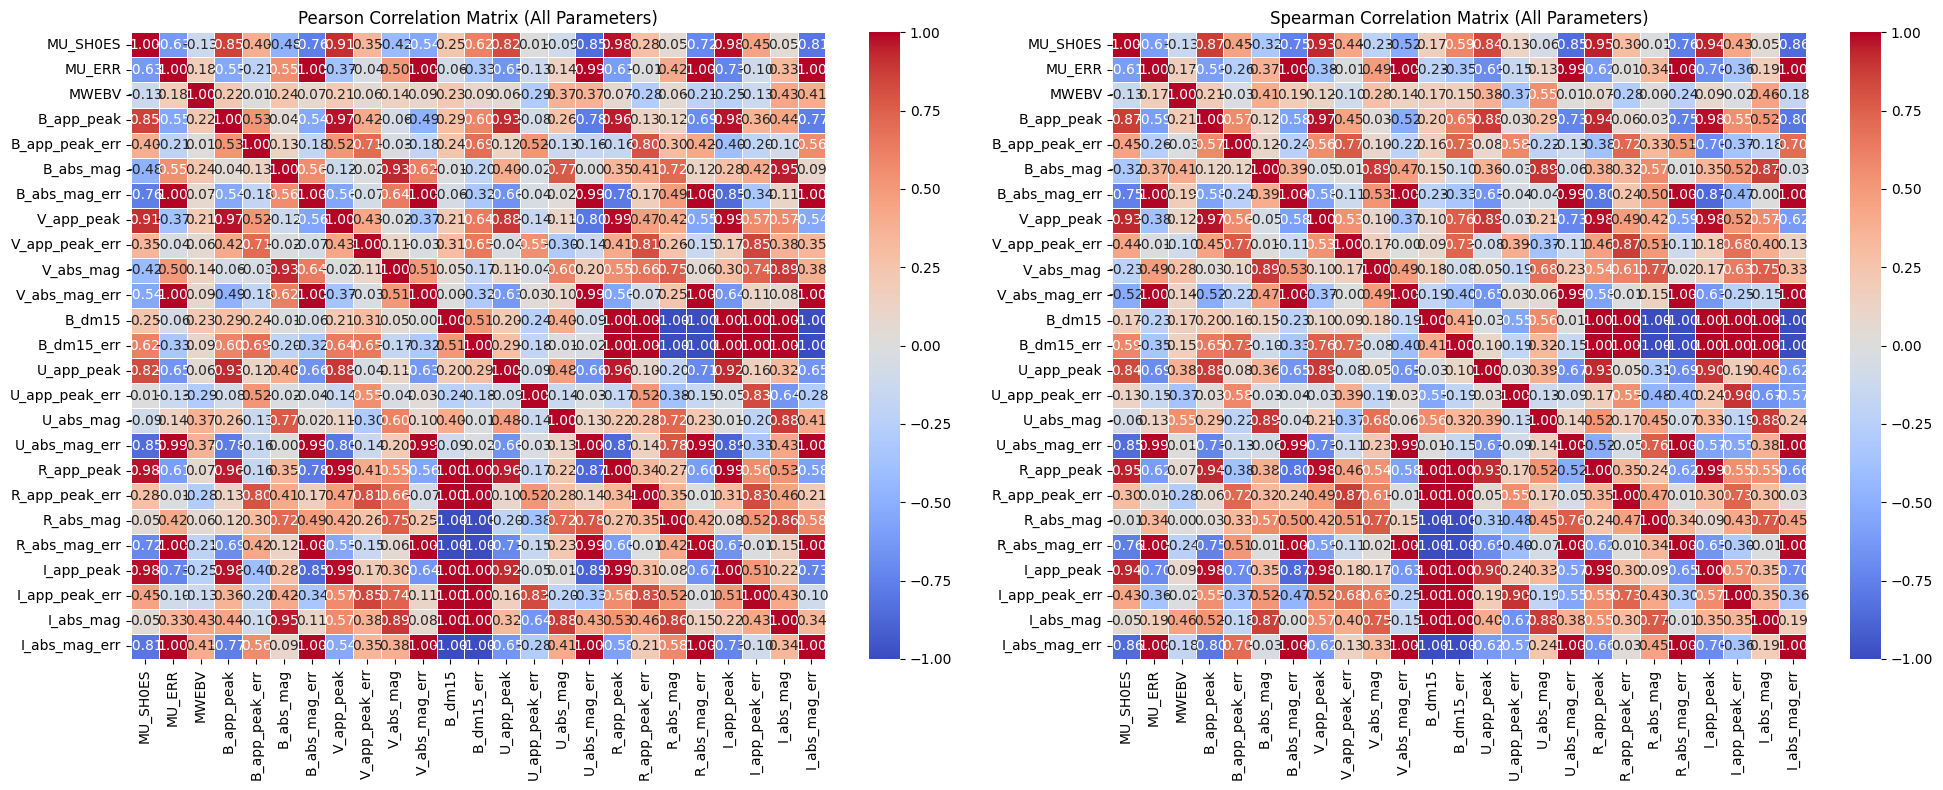


✅ Correlation plots generated!


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Ensure df is loaded from the previous EDA cells
# If df is not in the current environment, uncomment and run the following line:
# df = pd.read_excel('/content/cfa3_ubvri_cleaned.xlsx')

print("📊 Plotting Correlations...")

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# 1. Pearson Correlation Matrix
pearson_corr = numeric_df.corr(method='pearson')

# 2. Spearman Correlation Matrix
spearman_corr = numeric_df.corr(method='spearman')

plt.figure(figsize=(20, 8))

# Pearson Correlation Heatmap
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix (All Parameters)')

# Spearman Correlation Heatmap
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Matrix (All Parameters)')

plt.tight_layout()
plt.show()

print("\n✅ Correlation plots generated!")

Doing the KNN Imputation for my dataset to handle the missing values in the columns as seen lots of missing values were present in the dataste.....and then we plotted the correlation and spearson plot


In [21]:
import numpy as np
from sklearn.impute import KNNImputer

print("🧹 Starting KNN imputation for remaining missing values...")

# 4. Identify all numeric columns in the df_imputed DataFrame
numeric_cols_final = df_imputed.select_dtypes(include=[np.number]).columns.tolist()
print(f"🔢 Identifying {len(numeric_cols_final)} numeric columns for KNN imputation.")

# 5. Initialize a KNNImputer
imputer_knn = KNNImputer(n_neighbors=5, weights='distance')

# 6. Apply KNN imputation to all numeric columns
df_imputed_knn = pd.DataFrame(
    imputer_knn.fit_transform(df_imputed[numeric_cols_final]),
    columns=numeric_cols_final,
    index=df_imputed.index
)

# 7. Print the shape and missing data percentage after KNN imputation
print(f"✅ KNN imputation complete! Resulting DataFrame shape: {df_imputed_knn.shape}")
print("📈 Percentage of missing data after KNN imputation:")
print(df_imputed_knn.isnull().mean()*100)

🧹 Starting KNN imputation for remaining missing values...
🔢 Identifying 25 numeric columns for KNN imputation.
✅ KNN imputation complete! Resulting DataFrame shape: (112, 25)
📈 Percentage of missing data after KNN imputation:
MU_SH0ES          0.0
MU_ERR            0.0
MWEBV             0.0
B_app_peak        0.0
B_app_peak_err    0.0
B_abs_mag         0.0
B_abs_mag_err     0.0
V_app_peak        0.0
V_app_peak_err    0.0
V_abs_mag         0.0
V_abs_mag_err     0.0
B_dm15            0.0
B_dm15_err        0.0
U_app_peak        0.0
U_app_peak_err    0.0
U_abs_mag         0.0
U_abs_mag_err     0.0
R_app_peak        0.0
R_app_peak_err    0.0
R_abs_mag         0.0
R_abs_mag_err     0.0
I_app_peak        0.0
I_app_peak_err    0.0
I_abs_mag         0.0
I_abs_mag_err     0.0
dtype: float64


## Plot Correlations After Full Imputation

### Subtask:
Compute and visualize Pearson and Spearman correlation matrices for all numeric parameters in the fully imputed dataset, `df_imputed_knn`.


📊 Plotting Correlations...


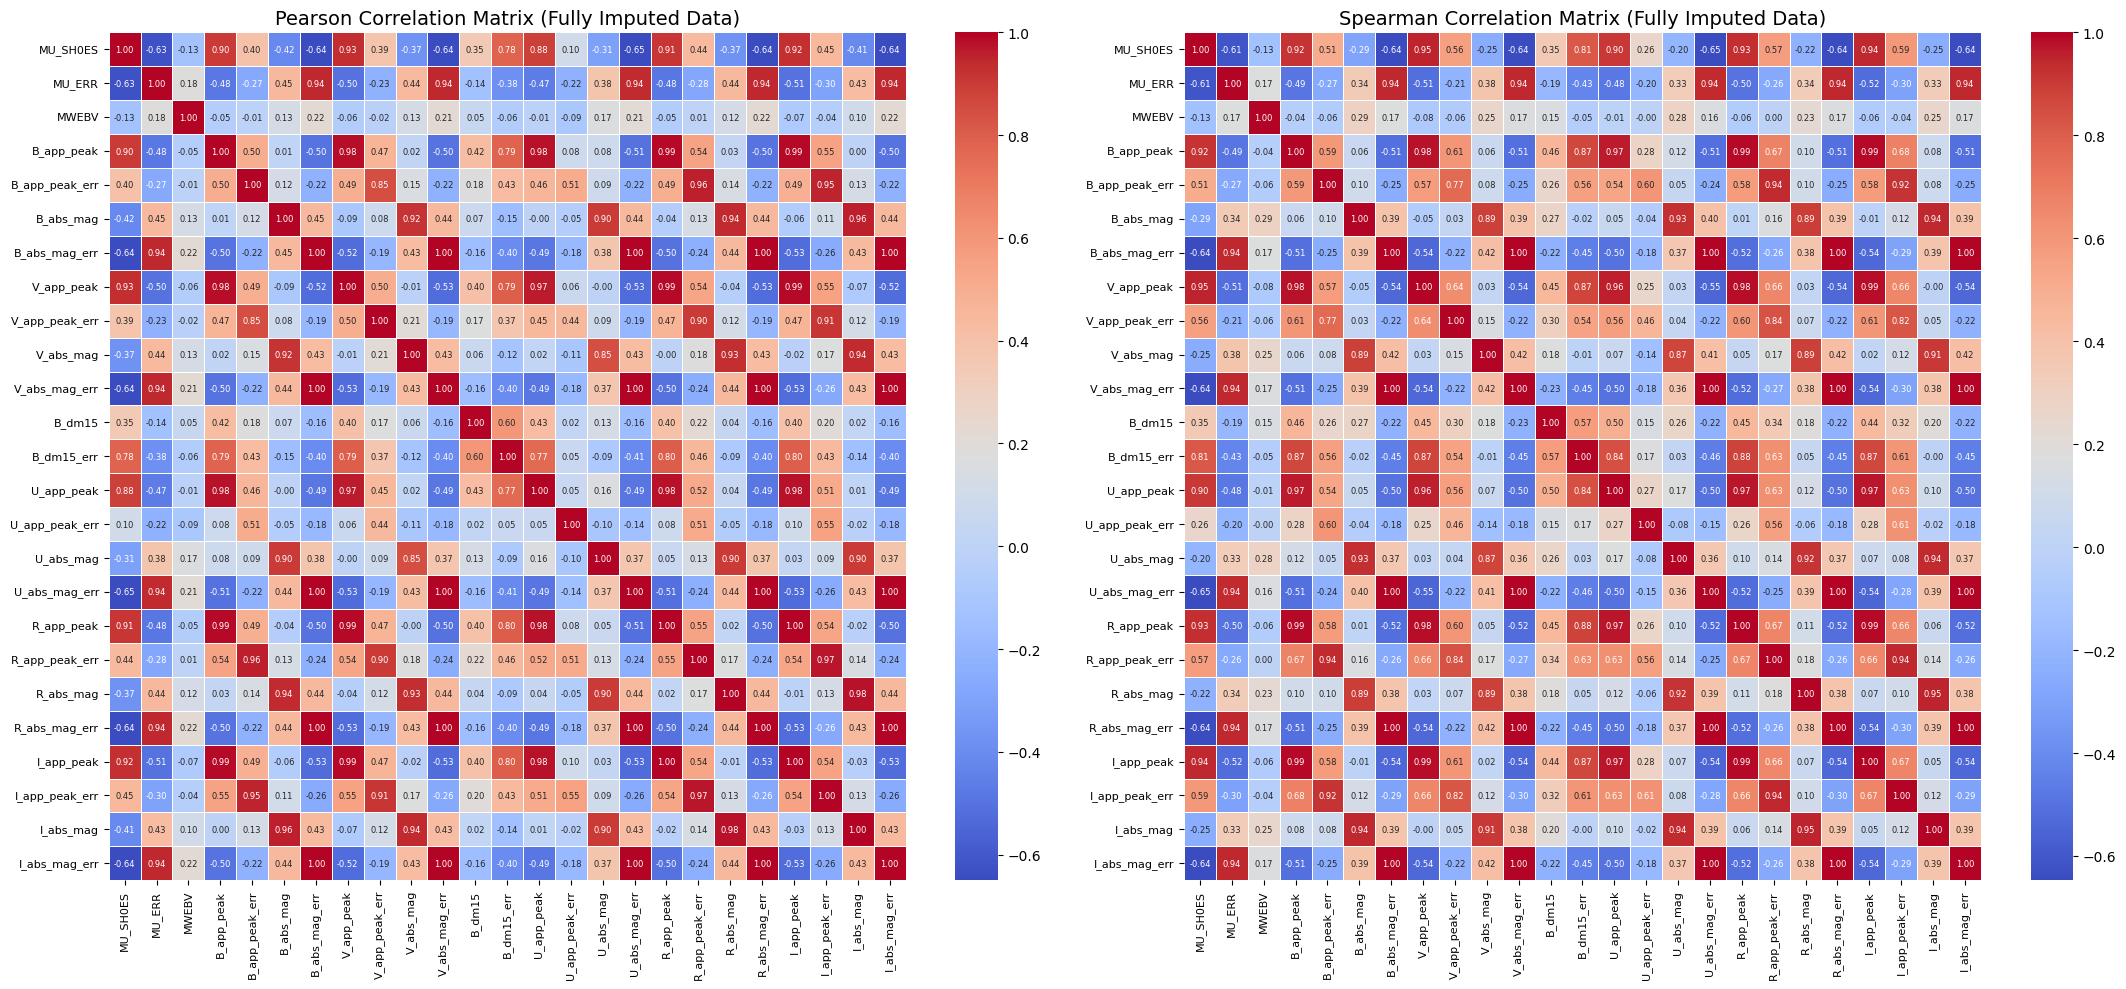


✅ Correlation plots for the fully imputed dataset generated!


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Ensure df is loaded from the previous EDA cells
# If df is not in the current environment, uncomment and run the following line:
# df = pd.read_excel('/content/cfa3_ubvri_cleaned.xlsx')

print("📊 Plotting Correlations...")

# Select only numeric columns for correlation calculation
numeric_df_imputed = df_imputed_knn.select_dtypes(include=np.number)

# 1. Pearson Correlation Matrix
pearson_corr_imputed = numeric_df_imputed.corr(method='pearson')

# 2. Spearman Correlation Matrix
spearman_corr_imputed = numeric_df_imputed.corr(method='spearman')

plt.figure(figsize=(22, 10)) # Increased figure size for better readability

# Pearson Correlation Heatmap
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.heatmap(pearson_corr_imputed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 6})
plt.title('Pearson Correlation Matrix (Fully Imputed Data)', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Spearman Correlation Heatmap
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.heatmap(spearman_corr_imputed, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 6})
plt.title('Spearman Correlation Matrix (Fully Imputed Data)', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

print("\n✅ Correlation plots for the fully imputed dataset generated!")

## Further Exploratory Data Analysis: Distributions and Pairwise Relationships

To further understand the characteristics of our fully imputed dataset, we will generate histograms/KDE plots for individual feature distributions and pair plots to visualize relationships between all pairs of features. These plots provide a visual complement to the correlation matrices and are crucial for identifying patterns, outliers, and potential data issues before advanced modeling.

📊 Plotting feature distributions (Histograms/KDEs)...


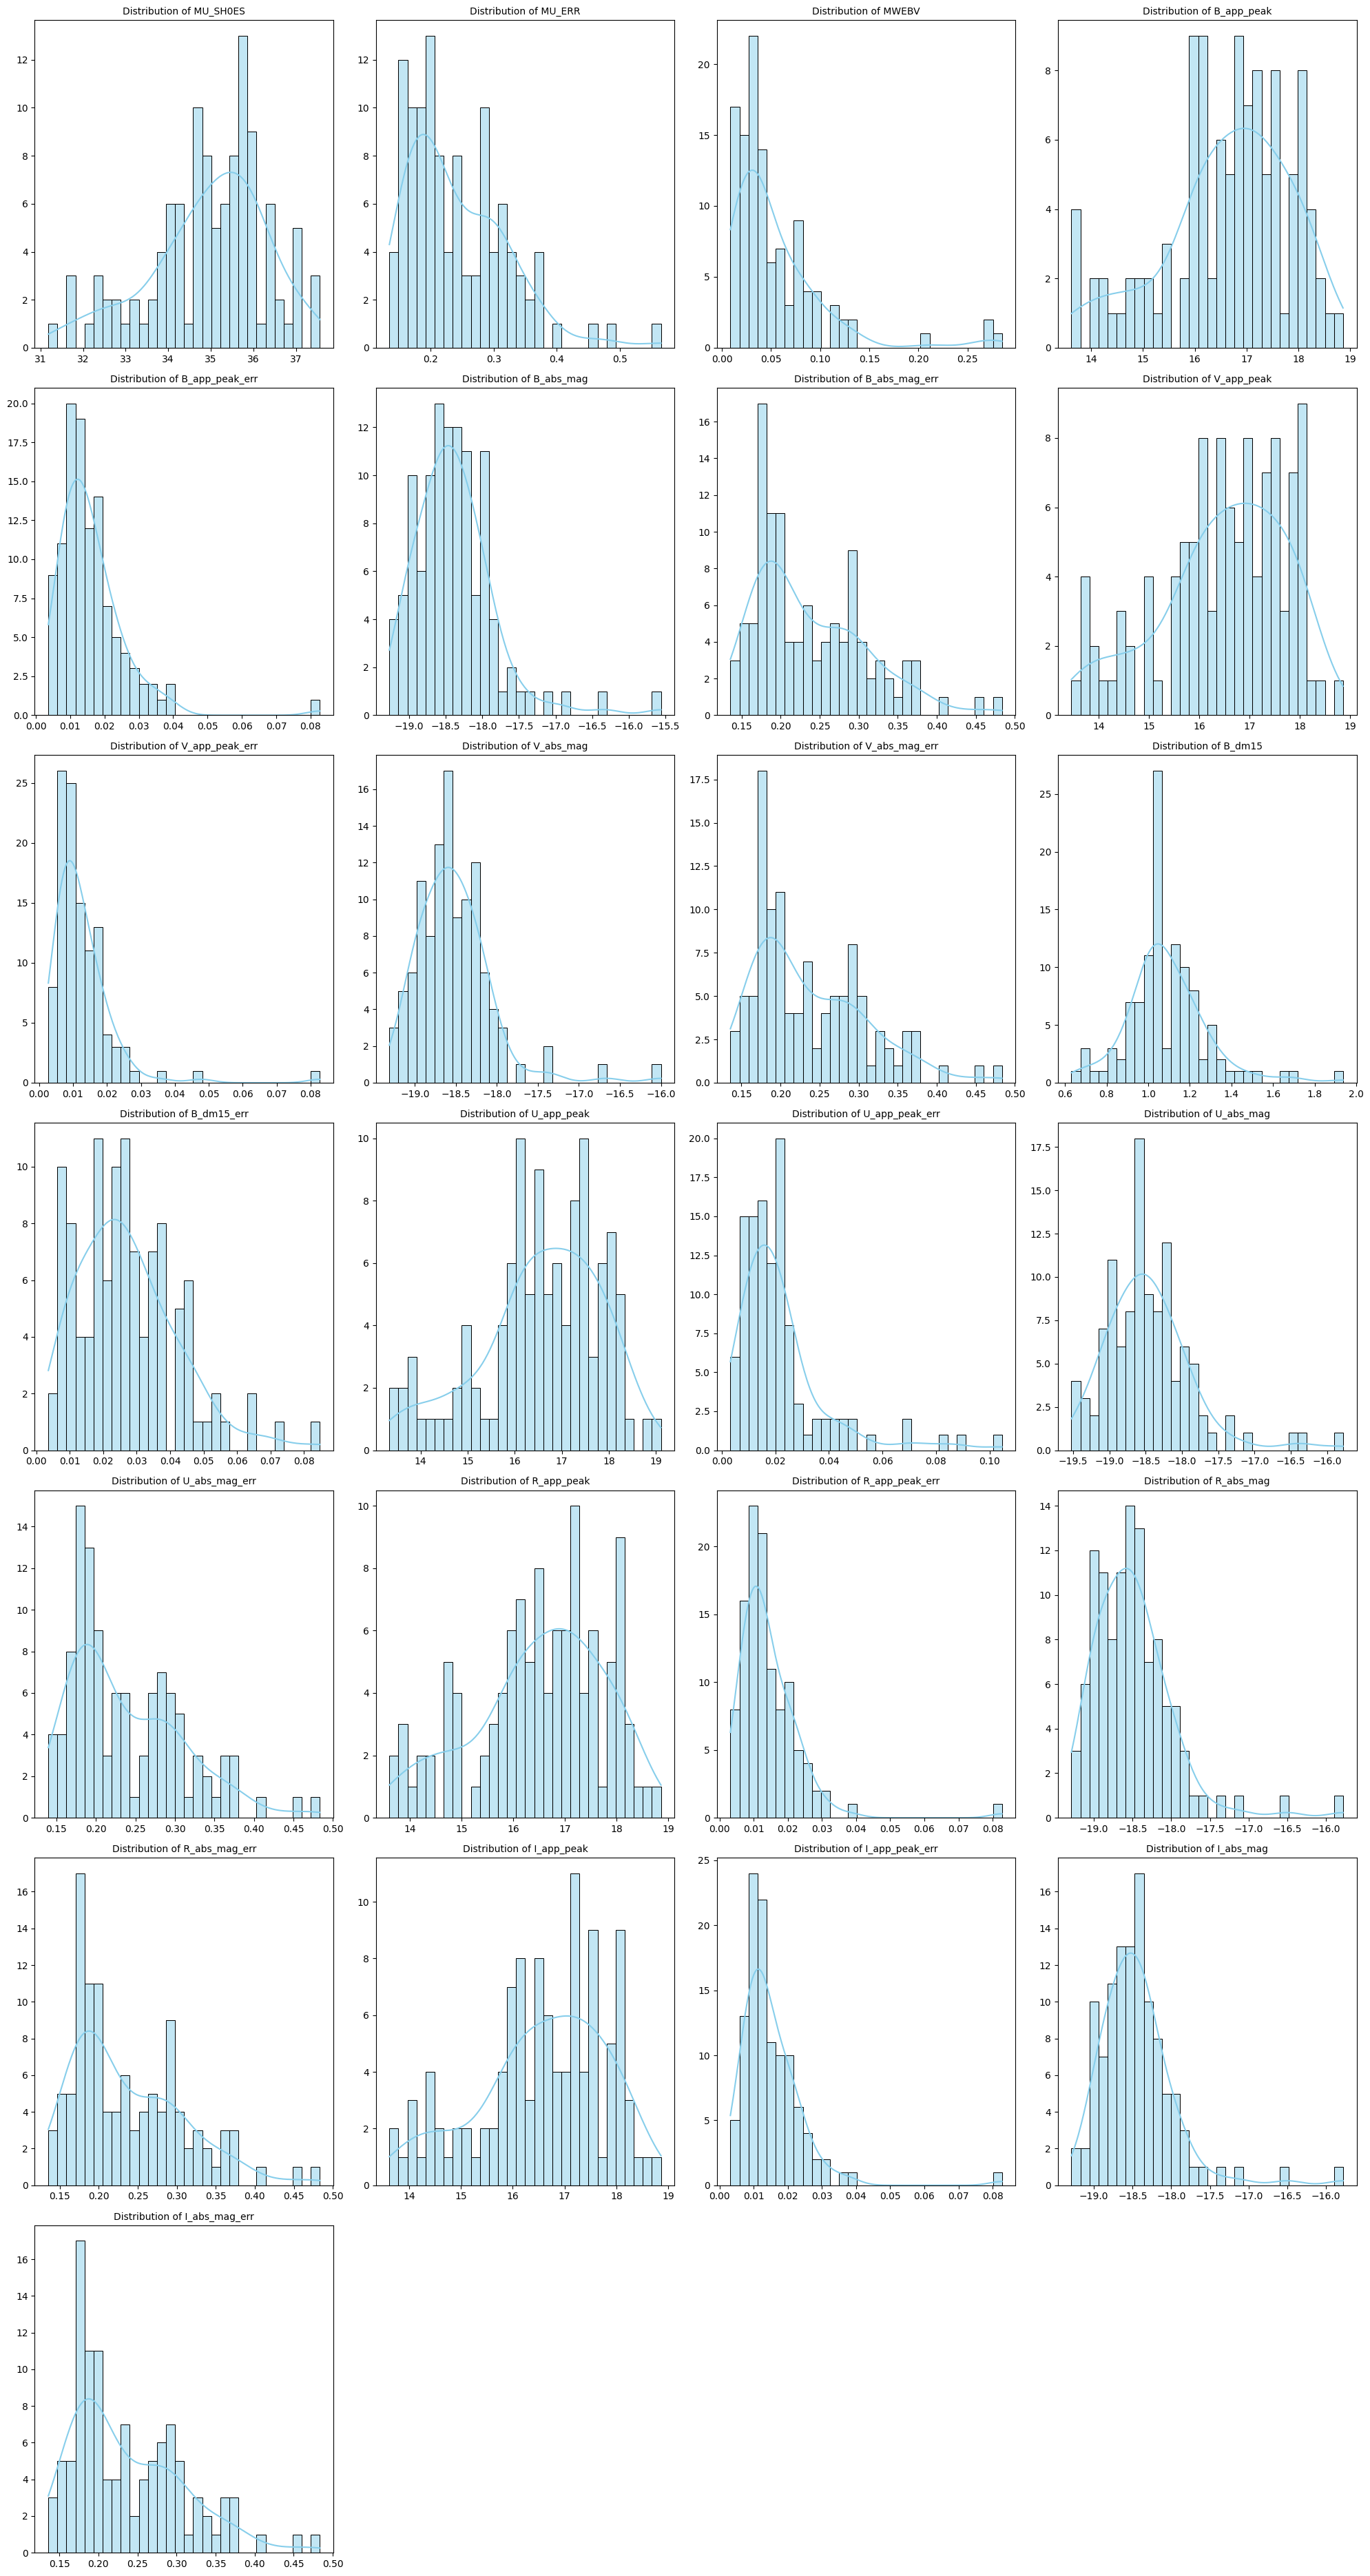

✅ Histograms/KDE plots generated!

📊 Generating Pair Plots for key features (may take a moment for many features)...


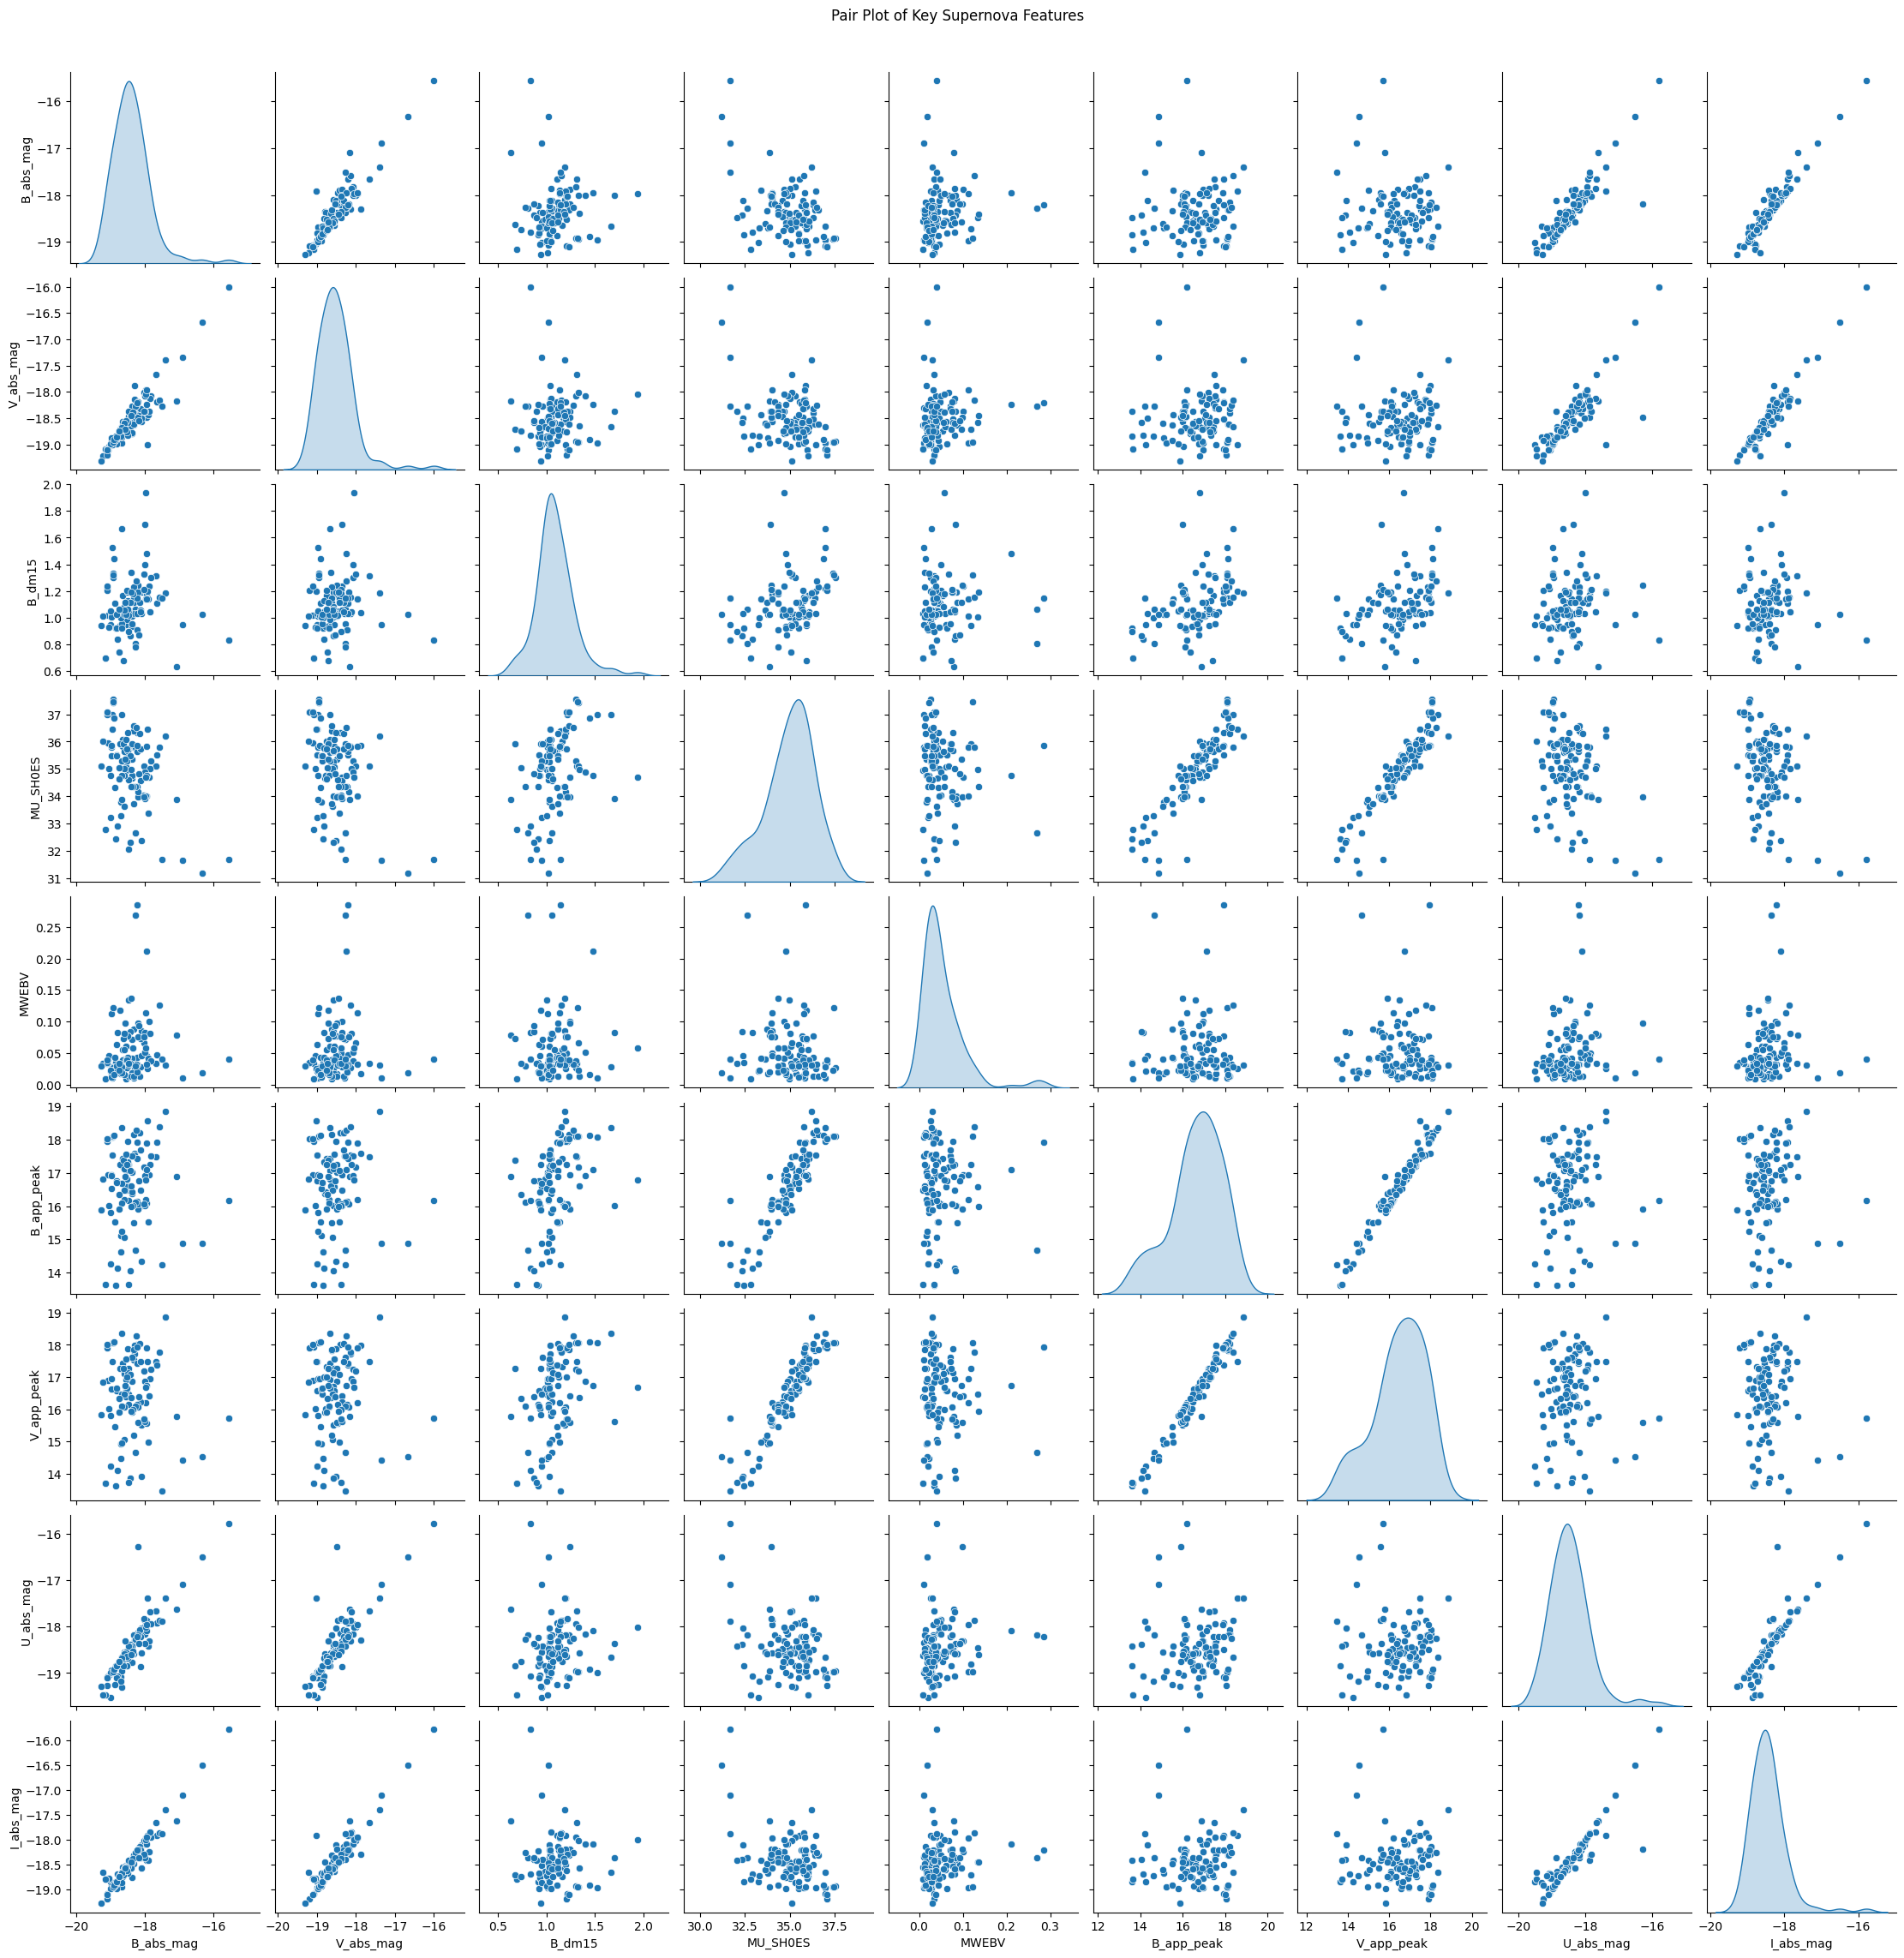

✅ Pair plots for key features generated!


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Plotting feature distributions (Histograms/KDEs)...")

# Get all numeric columns from the fully imputed DataFrame
numeric_cols = df_imputed_knn.select_dtypes(include=np.number).columns.tolist()

# Create histograms and KDE plots for all numeric features
# Adjusting figure size to accommodate many plots, and using fewer columns per row
plt.figure(figsize=(20, len(numeric_cols) * 1.5)) # Adjust height dynamically
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 4 + 1, 4, i + 1) # Max 4 plots per row
    sns.histplot(df_imputed_knn[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=10)
    plt.xlabel('') # Remove x-label to reduce clutter
    plt.ylabel('') # Remove y-label
plt.tight_layout()
plt.show()

print("✅ Histograms/KDE plots generated!")

print("\n📊 Generating Pair Plots for key features (may take a moment for many features)...")

# For 25+ features, a full pairplot can be very dense and slow.
# It's often better to select a subset of highly relevant features or create specific scatter plots.
# For demonstration, let's select some key features and plot a pair plot for them.
# If you want to plot all, simply use df_imputed_knn as the data source for sns.pairplot

key_features_for_pairplot = [
    'B_abs_mag', 'V_abs_mag', 'B_dm15', 'MU_SH0ES', 'MWEBV',
    'B_app_peak', 'V_app_peak', 'U_abs_mag', 'I_abs_mag'
]

# Filter out any key features that might not exist after specific feature selection in earlier steps
key_features_for_pairplot = [f for f in key_features_for_pairplot if f in df_imputed_knn.columns]

if len(key_features_for_pairplot) > 1:
    # Using a smaller subset for better visualization. If 'df_imputed_knn' is small enough, you can use it directly.
    sns.pairplot(df_imputed_knn[key_features_for_pairplot], diag_kind='kde')
    plt.suptitle('Pair Plot of Key Supernova Features', y=1.02) # Adjust title position
    plt.show()
    print("✅ Pair plots for key features generated!")
else:
    print("❗ Not enough key features selected for a meaningful pair plot. Skipping pair plots.")


📊 Generating scatter plots for clustering comparison...


NameError: name 'df_clustering_data' is not defined

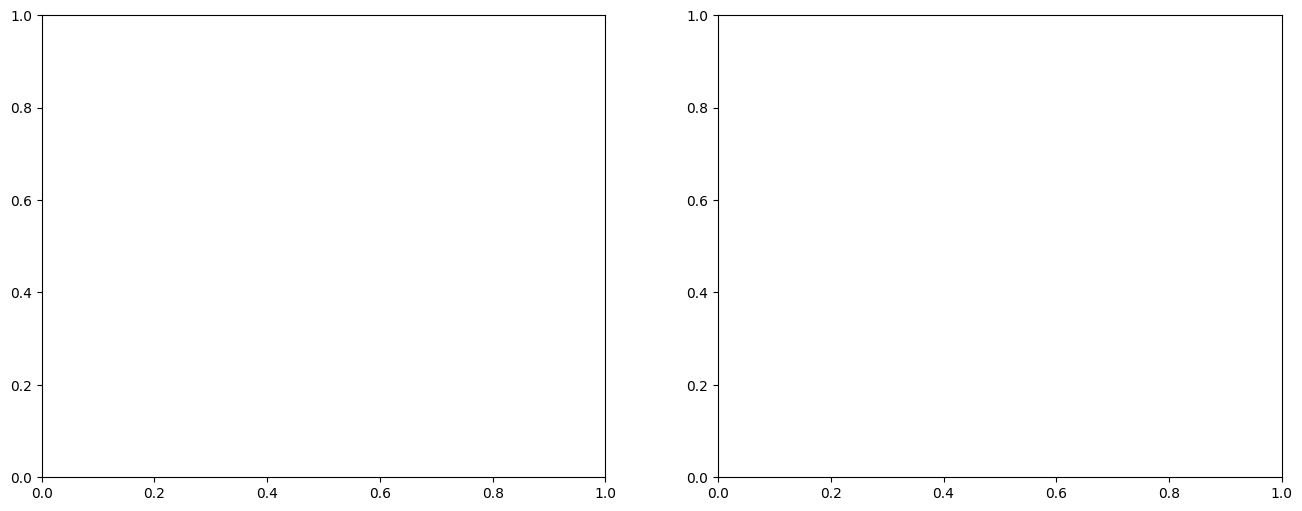

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Generating scatter plots for clustering comparison...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Spectral Clustering Assignment ---
sns.scatterplot(
    data=df_clustering_data, # Use the updated DataFrame
    x='B_dm15',
    y='B_abs_mag_predicted',
    hue='Spectral_Cluster',
    palette='viridis',
    s=100,
    ax=axes[0],
    legend='full'
)
axes[0].axvline(x=1.3, color='red', linestyle='--', label='B_dm15 = 1.3')
axes[0].set_title('Spectral Clustering vs. Predicted B_abs_mag')
axes[0].set_xlabel('B_dm15')
axes[0].set_ylabel('Predicted B_abs_mag')
axes[0].legend(title='Cluster')

# --- Plot 2: Physical Criterion (B_dm15 < 1.3) ---
df_clustering_data['Physical_Category'] = df_clustering_data['B_dm15'].apply(lambda x: '< 1.3' if x < 1.3 else '>= 1.3')
sns.scatterplot(
    data=df_clustering_data, # Use the updated DataFrame
    x='B_dm15',
    y='B_abs_mag_predicted',
    hue='Physical_Category',
    palette={'< 1.3': 'blue', '>= 1.3': 'green'},
    s=100,
    ax=axes[1],
    legend='full'
)
axes[1].axvline(x=1.3, color='red', linestyle='--', label='B_dm15 = 1.3')
axes[1].set_title('Physical Criterion (B_dm15 < 1.3) vs. Predicted B_abs_mag')
axes[1].set_xlabel('B_dm15')
axes[1].set_ylabel('Predicted B_abs_mag')
axes[1].legend(title='Category')

plt.tight_layout()
plt.show()

print("✅ Scatter plots generated.")

In [42]:
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Define the formula coefficients
coeff_a = -0.0585
coeff_b = 0.9776

# Calculate predicted B_abs_mag using the formula: (-a*(-log(B_dm15))) + (b*V_abs_mag)
# Using df_clustering_data (formerly df_filtered) which now contains all 112 imputed data points
df_clustering_data['B_abs_mag_predicted'] = (coeff_a * (-np.log(df_clustering_data['B_dm15']))) + (coeff_b * df_clustering_data['V_abs_mag'])

# Construct the feature matrix for clustering using B_dm15 and the calculated B_abs_mag
X = df_clustering_data[['B_dm15', 'B_abs_mag_predicted']].values

# Apply SpectralClustering with n_clusters=2 and affinity='nearest_neighbors' for KNN Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=42)
clusters = spectral_clustering.fit_predict(X)

df_clustering_data['Spectral_Cluster'] = clusters

print("Predicted B_abs_mag calculated and Spectral Clustering applied.")
print("First 5 rows with new columns:")
print(df_clustering_data[['B_dm15', 'V_abs_mag', 'B_abs_mag', 'B_abs_mag_predicted', 'Spectral_Cluster']].head())

NameError: name 'df_clustering_data' is not defined

## Spectral Clustering with Fully Imputed Data

This section performs spectral clustering on the `df_imputed_knn` dataset, which contains all 112 supernovae after comprehensive missing value imputation. We will use the specified formula for `B_abs_mag_predicted` and then visualize the clustering results against the physical `B_dm15` criterion.

In [40]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns

print("🔄 Preparing data for clustering from df_imputed_knn...")

# Use df_imputed_knn which has all missing values handled (112 data points)
df_clustering_data_imputed = df_imputed_knn.copy()

# Define the formula coefficients (as clarified by the user)
coeff_a = -0.0585
coeff_b = 0.9776

# Calculate predicted B_abs_mag using the formula: (-a*(-log(B_dm15))) + (b*V_abs_mag)
df_clustering_data_imputed['B_abs_mag_predicted'] = (coeff_a * (-np.log(df_clustering_data_imputed['B_dm15']))) + \
                                                   (coeff_b * df_clustering_data_imputed['V_abs_mag'])

# Construct the feature matrix for clustering using B_dm15 and the calculated B_abs_mag
X_imputed = df_clustering_data_imputed[['B_dm15', 'B_abs_mag_predicted']].values

# Apply SpectralClustering with n_clusters=2 and affinity='nearest_neighbors' for KNN Spectral Clustering
spectral_clustering_imputed = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=42)
clusters_imputed = spectral_clustering_imputed.fit_predict(X_imputed)

df_clustering_data_imputed['Spectral_Cluster'] = clusters_imputed

print("✅ Predicted B_abs_mag calculated and Spectral Clustering applied to imputed data.")
print("First 5 rows with new columns for imputed data:")
print(df_clustering_data_imputed[['B_dm15', 'V_abs_mag', 'B_abs_mag', 'B_abs_mag_predicted', 'Spectral_Cluster']].head())

🔄 Preparing data for clustering from df_imputed_knn...
✅ Predicted B_abs_mag calculated and Spectral Clustering applied to imputed data.
First 5 rows with new columns for imputed data:
     B_dm15  V_abs_mag  B_abs_mag  B_abs_mag_predicted  Spectral_Cluster
0  0.630867 -18.170956 -17.085000           -17.790876                 1
1  1.025180 -18.879841 -18.706792           -18.455477                 0
2  1.525524 -18.978267 -18.956008           -18.528447                 0
3  1.122167 -18.397223 -18.212131           -17.978383                 1
4  1.192420 -18.571040 -18.098816           -18.144754                 1


📊 Generating scatter plots for clustering comparison with imputed data...


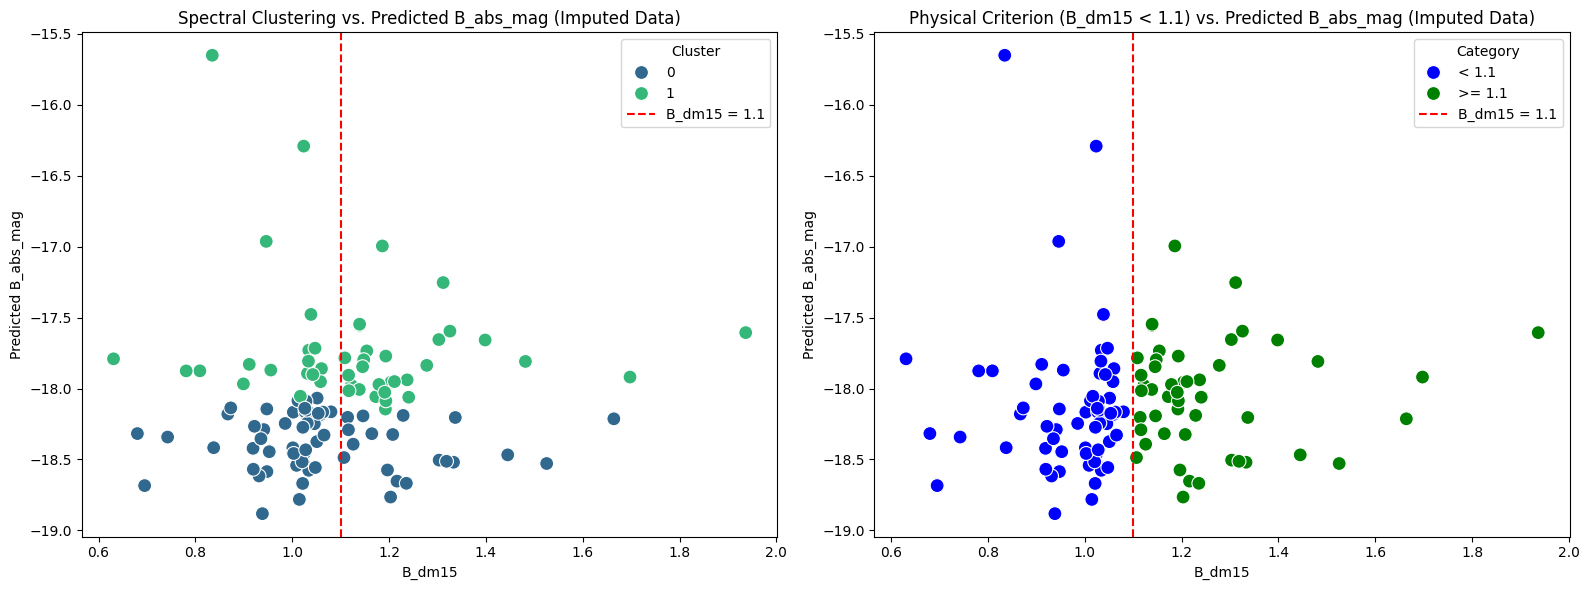

✅ Scatter plots generated for imputed data.


In [43]:
print("📊 Generating scatter plots for clustering comparison with imputed data...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Spectral Clustering Assignment ---
sns.scatterplot(
    data=df_clustering_data_imputed,
    x='B_dm15',
    y='B_abs_mag_predicted',
    hue='Spectral_Cluster',
    palette='viridis',
    s=100,
    ax=axes[0],
    legend='full'
)
axes[0].axvline(x=1.1, color='red', linestyle='--', label='B_dm15 = 1.1') # Changed threshold to 1.1
axes[0].set_title('Spectral Clustering vs. Predicted B_abs_mag (Imputed Data)')
axes[0].set_xlabel('B_dm15')
axes[0].set_ylabel('Predicted B_abs_mag')
axes[0].legend(title='Cluster')

# --- Plot 2: Physical Criterion (B_dm15 < 1.1) ---
df_clustering_data_imputed['Physical_Category'] = df_clustering_data_imputed['B_dm15'].apply(lambda x: '< 1.1' if x < 1.1 else '>= 1.1') # Changed threshold to 1.1
sns.scatterplot(
    data=df_clustering_data_imputed,
    x='B_dm15',
    y='B_abs_mag_predicted',
    hue='Physical_Category',
    palette={'< 1.1': 'blue', '>= 1.1': 'green'}, # Changed palette labels
    s=100,
    ax=axes[1],
    legend='full'
)
axes[1].axvline(x=1.1, color='red', linestyle='--', label='B_dm15 = 1.1') # Changed threshold to 1.1
axes[1].set_title('Physical Criterion (B_dm15 < 1.1) vs. Predicted B_abs_mag (Imputed Data)')
axes[1].set_xlabel('B_dm15')
axes[1].set_ylabel('Predicted B_abs_mag')
axes[1].legend(title='Category')

plt.tight_layout()
plt.show()

print("✅ Scatter plots generated for imputed data.")

📊 Generating scatter plots with B_dm15 on Y-axis...


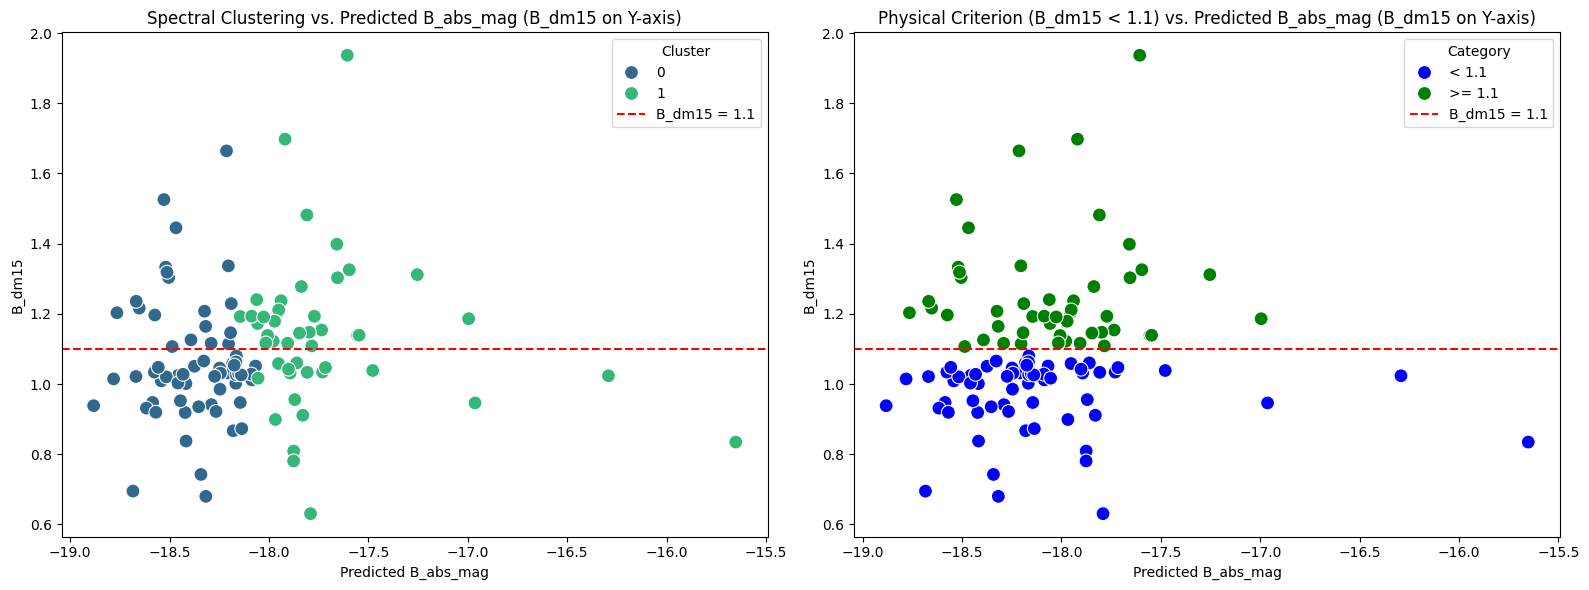

✅ Scatter plots with B_dm15 on Y-axis generated!


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Generating scatter plots with B_dm15 on Y-axis...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Spectral Clustering Assignment (B_dm15 on Y-axis) ---
sns.scatterplot(
    data=df_clustering_data_imputed,
    x='B_abs_mag_predicted',
    y='B_dm15',
    hue='Spectral_Cluster',
    palette='viridis',
    s=100,
    ax=axes[0],
    legend='full'
)
axes[0].axhline(y=1.1, color='red', linestyle='--', label='B_dm15 = 1.1')
axes[0].set_title('Spectral Clustering vs. Predicted B_abs_mag (B_dm15 on Y-axis)')
axes[0].set_xlabel('Predicted B_abs_mag')
axes[0].set_ylabel('B_dm15')
axes[0].legend(title='Cluster')

# --- Plot 2: Physical Criterion (B_dm15 < 1.1) (B_dm15 on Y-axis) ---
df_clustering_data_imputed['Physical_Category'] = df_clustering_data_imputed['B_dm15'].apply(lambda x: '< 1.1' if x < 1.1 else '>= 1.1')
sns.scatterplot(
    data=df_clustering_data_imputed,
    x='B_abs_mag_predicted',
    y='B_dm15',
    hue='Physical_Category',
    palette={'< 1.1': 'blue', '>= 1.1': 'green'},
    s=100,
    ax=axes[1],
    legend='full'
)
axes[1].axhline(y=1.1, color='red', linestyle='--', label='B_dm15 = 1.1')
axes[1].set_title('Physical Criterion (B_dm15 < 1.1) vs. Predicted B_abs_mag (B_dm15 on Y-axis)')
axes[1].set_xlabel('Predicted B_abs_mag')
axes[1].set_ylabel('B_dm15')
axes[1].legend(title='Category')

plt.tight_layout()
plt.show()

print("✅ Scatter plots with B_dm15 on Y-axis generated!")

## Spectral Clustering with Outlier Handling

This section performs spectral clustering after explicitly identifying and removing outliers from the `B_dm15` and `B_abs_mag_predicted` features. Outliers can heavily influence clustering results, and removing them might reveal clearer patterns. We will use the Interquartile Range (IQR) method for outlier detection.

🧹 Handling outliers and re-performing spectral clustering...
Original data points: 112
Data points after outlier removal: 99
✅ Features scaled using StandardScaler.
✅ Outliers handled, B_abs_mag_predicted recalculated, features scaled, and Spectral Clustering re-applied to cleaned data.
First 5 rows of the cleaned data with new columns:
     B_dm15  V_abs_mag  B_abs_mag  B_abs_mag_predicted  Spectral_Cluster
1  1.025180 -18.879841 -18.706792           -18.455477                 1
3  1.122167 -18.397223 -18.212131           -17.978383                 0
4  1.192420 -18.571040 -18.098816           -18.144754                 0
5  1.002272 -18.583070 -18.477268           -18.166676                 1
6  1.204086 -18.377380 -18.016626           -17.954862                 0
📊 Generating scatter plots for clustering comparison with outlier handling and scaling...


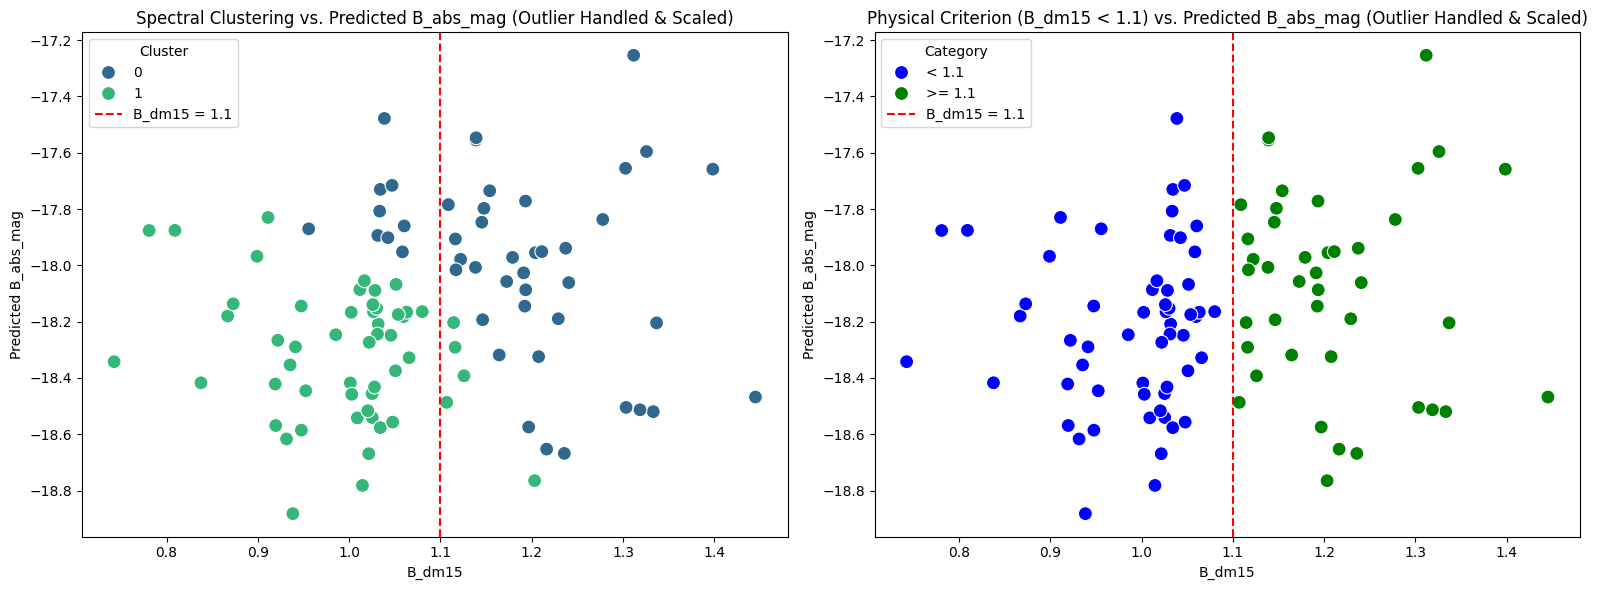

✅ Scatter plots with outlier handling and scaling generated!


In [47]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("🧹 Handling outliers and re-performing spectral clustering...")

# Make a copy of the imputed data for outlier handling
df_clustering_data_cleaned = df_clustering_data_imputed.copy()

# --- 1. Outlier Detection and Removal using IQR method ---
features_for_outlier_detection = ['B_dm15', 'B_abs_mag_predicted']

for col in features_for_outlier_detection:
    Q1 = df_clustering_data_cleaned[col].quantile(0.25)
    Q3 = df_clustering_data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out outliers
    df_clustering_data_cleaned = df_clustering_data_cleaned[
        (df_clustering_data_cleaned[col] >= lower_bound) &
        (df_clustering_data_cleaned[col] <= upper_bound)
    ]

print(f"Original data points: {len(df_clustering_data_imputed)}")
print(f"Data points after outlier removal: {len(df_clustering_data_cleaned)}")

# --- 2. Re-calculate predicted B_abs_mag (if needed, but already present in cleaned df) ---
# The formula calculation was done before and copied, so it's already in df_clustering_data_cleaned
# Define the formula coefficients (as clarified by the user)
coeff_a = -0.0585
coeff_b = 0.9776
# Ensure the predicted column is there, or re-calculate it for the cleaned data
df_clustering_data_cleaned['B_abs_mag_predicted'] = (coeff_a * (-np.log(df_clustering_data_cleaned['B_dm15']))) + \
                                                     (coeff_b * df_clustering_data_cleaned['V_abs_mag'])

# --- 3. Prepare data for Spectral Clustering and apply scaling ---
X_cleaned_raw = df_clustering_data_cleaned[['B_dm15', 'B_abs_mag_predicted']].values

# Apply StandardScaler to the features
scaler = StandardScaler()
X_cleaned = scaler.fit_transform(X_cleaned_raw)
print("✅ Features scaled using StandardScaler.")

spectral_clustering_cleaned = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=42)
clusters_cleaned = spectral_clustering_cleaned.fit_predict(X_cleaned)

df_clustering_data_cleaned['Spectral_Cluster'] = clusters_cleaned

print("✅ Outliers handled, B_abs_mag_predicted recalculated, features scaled, and Spectral Clustering re-applied to cleaned data.")
print("First 5 rows of the cleaned data with new columns:")
print(df_clustering_data_cleaned[['B_dm15', 'V_abs_mag', 'B_abs_mag', 'B_abs_mag_predicted', 'Spectral_Cluster']].head())

# --- 4. Generate plots with B_dm15 on X-axis ---
print("📊 Generating scatter plots for clustering comparison with outlier handling and scaling...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Spectral Clustering Assignment (B_dm15 on X-axis)
sns.scatterplot(
    data=df_clustering_data_cleaned,
    x='B_dm15',
    y='B_abs_mag_predicted',
    hue='Spectral_Cluster',
    palette='viridis',
    s=100,
    ax=axes[0],
    legend='full'
)
axes[0].axvline(x=1.1, color='red', linestyle='--', label='B_dm15 = 1.1')
axes[0].set_title('Spectral Clustering vs. Predicted B_abs_mag (Outlier Handled & Scaled)')
axes[0].set_xlabel('B_dm15')
axes[0].set_ylabel('Predicted B_abs_mag')
axes[0].legend(title='Cluster')

# Plot 2: Physical Criterion (B_dm15 < 1.1) (B_dm15 on X-axis)
df_clustering_data_cleaned['Physical_Category'] = df_clustering_data_cleaned['B_dm15'].apply(lambda x: '< 1.1' if x < 1.1 else '>= 1.1')
sns.scatterplot(
    data=df_clustering_data_cleaned,
    x='B_dm15',
    y='B_abs_mag_predicted',
    hue='Physical_Category',
    palette={'< 1.1': 'blue', '>= 1.1': 'green'},
    s=100,
    ax=axes[1],
    legend='full'
)
axes[1].axvline(x=1.1, color='red', linestyle='--', label='B_dm15 = 1.1')
axes[1].set_title('Physical Criterion (B_dm15 < 1.1) vs. Predicted B_abs_mag (Outlier Handled & Scaled)')
axes[1].set_xlabel('B_dm15')
axes[1].set_ylabel('Predicted B_abs_mag')
axes[1].legend(title='Category')

plt.tight_layout()
plt.show()

print("✅ Scatter plots with outlier handling and scaling generated!")

📊 Generating scatter plots for 3-cluster spectral clustering and physical categories...


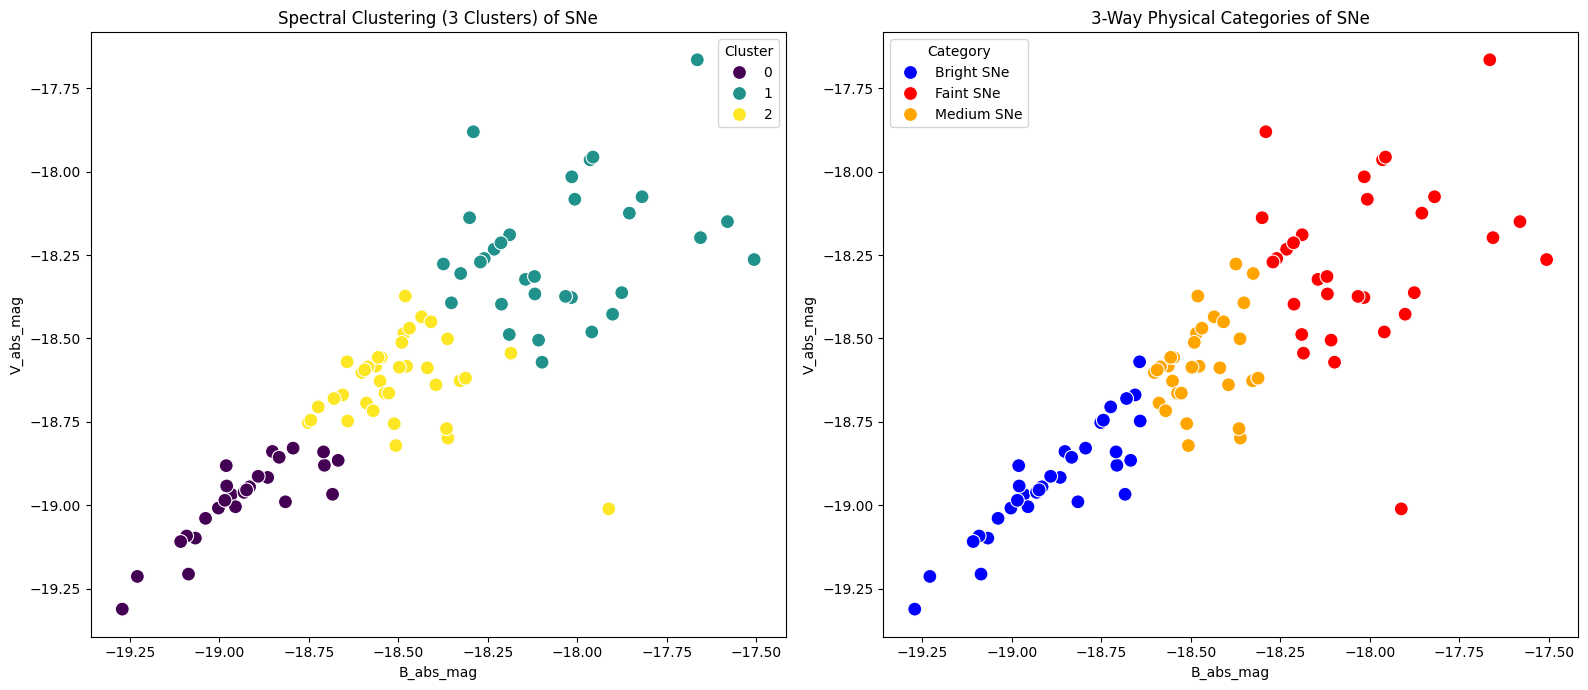

✅ Scatter plots for 3-cluster spectral clustering and physical categories generated!


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Generating scatter plots for 3-cluster spectral clustering and physical categories...")

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- Plot 1: Spectral Clustering Assignment (3 Clusters) ---
sns.scatterplot(
    data=df_clustering_data_cleaned,
    x='B_abs_mag',
    y='V_abs_mag',
    hue='Spectral_Cluster_3',
    palette='viridis',
    s=100,
    ax=axes[0],
    legend='full'
)
axes[0].set_title('Spectral Clustering (3 Clusters) of SNe')
axes[0].set_xlabel('B_abs_mag')
axes[0].set_ylabel('V_abs_mag')
axes[0].legend(title='Cluster')

# --- Plot 2: 3-Way Physical Categories ---
# Define a custom palette for better distinction of physical categories
physical_palette = {'Bright SNe': 'blue', 'Medium SNe': 'orange', 'Faint SNe': 'red'}
sns.scatterplot(
    data=df_clustering_data_cleaned,
    x='B_abs_mag',
    y='V_abs_mag',
    hue='Physical_Category_3Way',
    palette=physical_palette,
    s=100,
    ax=axes[1],
    legend='full'
)
axes[1].set_title('3-Way Physical Categories of SNe')
axes[1].set_xlabel('B_abs_mag')
axes[1].set_ylabel('V_abs_mag')
axes[1].legend(title='Category')

plt.tight_layout()
plt.show()

print("✅ Scatter plots for 3-cluster spectral clustering and physical categories generated!")

📊 Generating scatter plots for 3-cluster spectral clustering and physical categories...


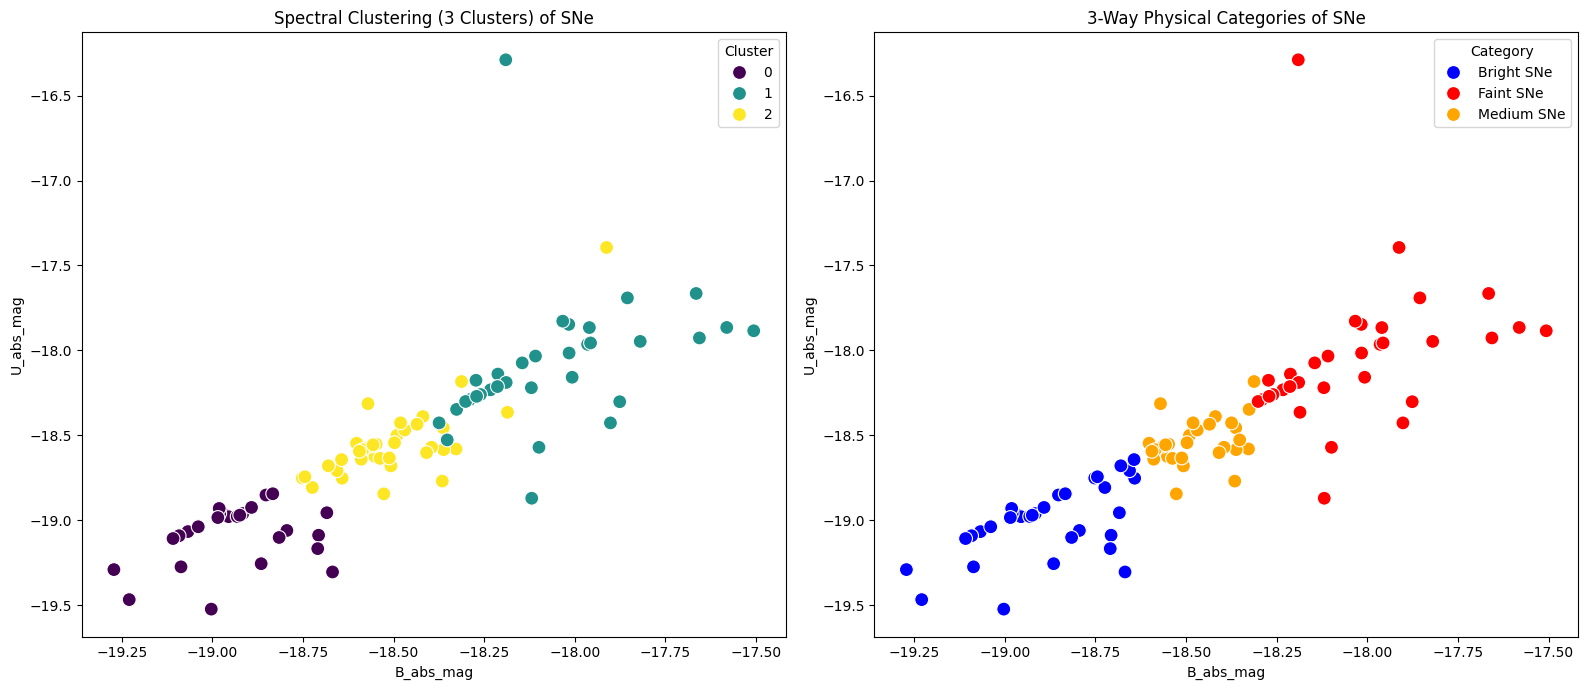

✅ Scatter plots for 3-cluster spectral clustering and physical categories generated!


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Generating scatter plots for 3-cluster spectral clustering and physical categories...")

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- Plot 1: Spectral Clustering Assignment (3 Clusters) ---
sns.scatterplot(
    data=df_clustering_data_cleaned,
    x='B_abs_mag',
    y='U_abs_mag',
    hue='Spectral_Cluster_3',
    palette='viridis',
    s=100,
    ax=axes[0],
    legend='full'
)
axes[0].set_title('Spectral Clustering (3 Clusters) of SNe')
axes[0].set_xlabel('B_abs_mag')
axes[0].set_ylabel('U_abs_mag')
axes[0].legend(title='Cluster')

# --- Plot 2: 3-Way Physical Categories ---
# Define a custom palette for better distinction of physical categories
physical_palette = {'Bright SNe': 'blue', 'Medium SNe': 'orange', 'Faint SNe': 'red'}
sns.scatterplot(
    data=df_clustering_data_cleaned,
    x='B_abs_mag',
    y='U_abs_mag',
    hue='Physical_Category_3Way',
    palette=physical_palette,
    s=100,
    ax=axes[1],
    legend='full'
)
axes[1].set_title('3-Way Physical Categories of SNe')
axes[1].set_xlabel('B_abs_mag')
axes[1].set_ylabel('U_abs_mag')
axes[1].legend(title='Category')

plt.tight_layout()
plt.show()

print("✅ Scatter plots for 3-cluster spectral clustering and physical categories generated!")

📊 Generating scatter plots for 3-cluster spectral clustering and physical categories...


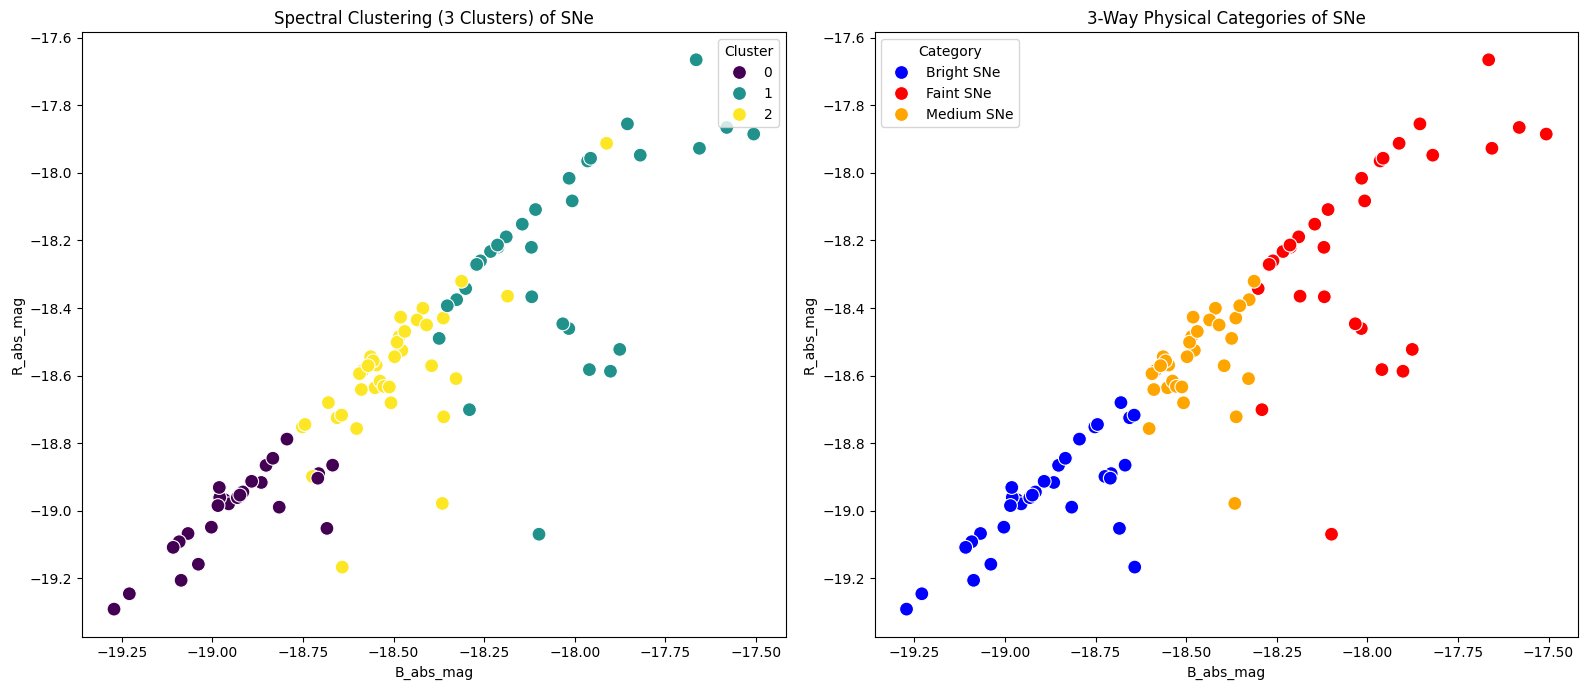

✅ Scatter plots for 3-cluster spectral clustering and physical categories generated!


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Generating scatter plots for 3-cluster spectral clustering and physical categories...")

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- Plot 1: Spectral Clustering Assignment (3 Clusters) ---
sns.scatterplot(
    data=df_clustering_data_cleaned,
    x='B_abs_mag',
    y='R_abs_mag',
    hue='Spectral_Cluster_3',
    palette='viridis',
    s=100,
    ax=axes[0],
    legend='full'
)
axes[0].set_title('Spectral Clustering (3 Clusters) of SNe')
axes[0].set_xlabel('B_abs_mag')
axes[0].set_ylabel('R_abs_mag')
axes[0].legend(title='Cluster')

# --- Plot 2: 3-Way Physical Categories ---
# Define a custom palette for better distinction of physical categories
physical_palette = {'Bright SNe': 'blue', 'Medium SNe': 'orange', 'Faint SNe': 'red'}
sns.scatterplot(
    data=df_clustering_data_cleaned,
    x='B_abs_mag',
    y='R_abs_mag',
    hue='Physical_Category_3Way',
    palette=physical_palette,
    s=100,
    ax=axes[1],
    legend='full'
)
axes[1].set_title('3-Way Physical Categories of SNe')
axes[1].set_xlabel('B_abs_mag')
axes[1].set_ylabel('R_abs_mag')
axes[1].legend(title='Category')

plt.tight_layout()
plt.show()

print("✅ Scatter plots for 3-cluster spectral clustering and physical categories generated!")

📊 Generating scatter plots for 3-cluster spectral clustering and physical categories...


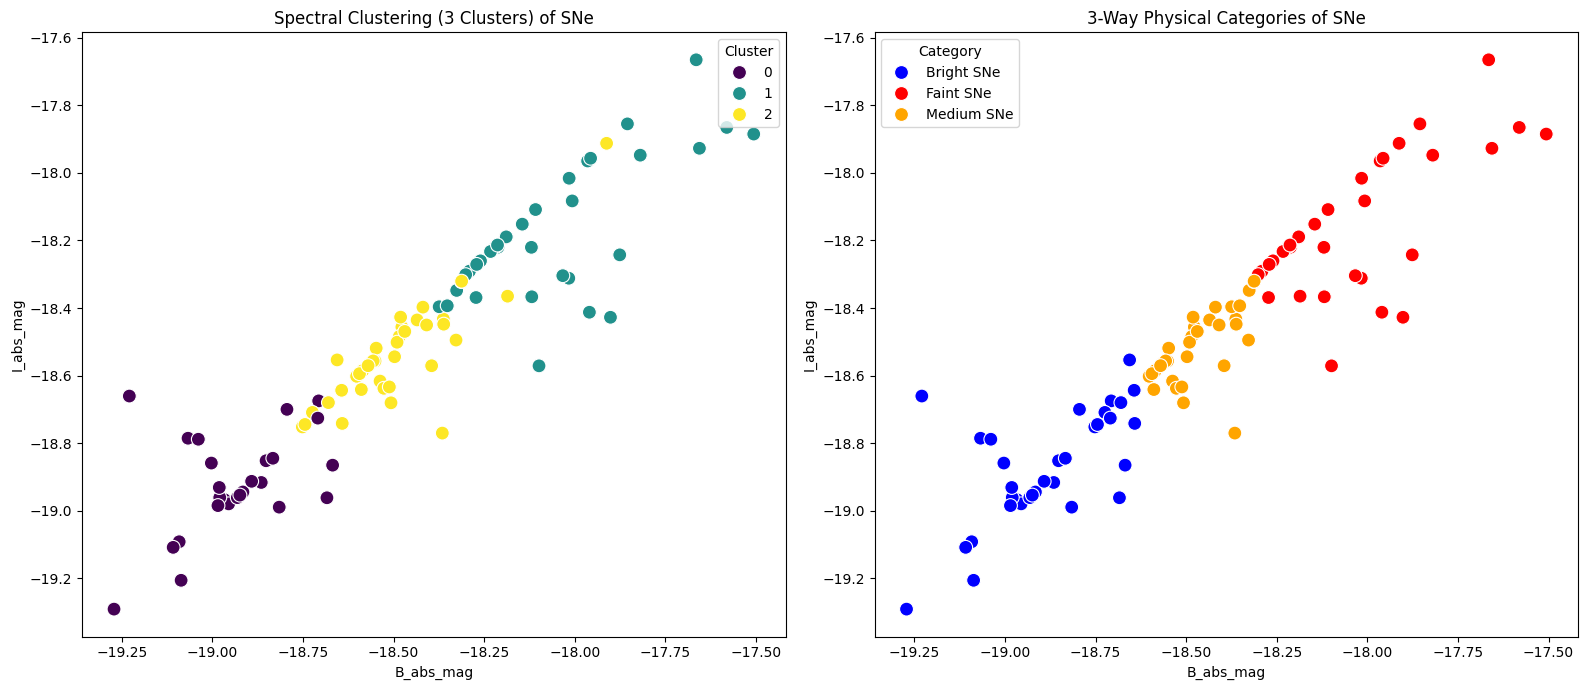

✅ Scatter plots for 3-cluster spectral clustering and physical categories generated!


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Generating scatter plots for 3-cluster spectral clustering and physical categories...")

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- Plot 1: Spectral Clustering Assignment (3 Clusters) ---
sns.scatterplot(
    data=df_clustering_data_cleaned,
    x='B_abs_mag',
    y='I_abs_mag',
    hue='Spectral_Cluster_3',
    palette='viridis',
    s=100,
    ax=axes[0],
    legend='full'
)
axes[0].set_title('Spectral Clustering (3 Clusters) of SNe')
axes[0].set_xlabel('B_abs_mag')
axes[0].set_ylabel('I_abs_mag')
axes[0].legend(title='Cluster')

# --- Plot 2: 3-Way Physical Categories ---
# Define a custom palette for better distinction of physical categories
physical_palette = {'Bright SNe': 'blue', 'Medium SNe': 'orange', 'Faint SNe': 'red'}
sns.scatterplot(
    data=df_clustering_data_cleaned,
    x='B_abs_mag',
    y='I_abs_mag',
    hue='Physical_Category_3Way',
    palette=physical_palette,
    s=100,
    ax=axes[1],
    legend='full'
)
axes[1].set_title('3-Way Physical Categories of SNe')
axes[1].set_xlabel('B_abs_mag')
axes[1].set_ylabel('I_abs_mag')
axes[1].legend(title='Category')

plt.tight_layout()
plt.show()

print("✅ Scatter plots for 3-cluster spectral clustering and physical categories generated!")

## New Cell: Re-establish Data Context and Generate Trend Plots

### Subtask:
Create a new code cell, re-establish all necessary dataframes (`df_imputed_knn`, `df_clustering_data_imputed`, `df_clustering_data_cleaned`) with their respective clustering and prediction columns, and then generate violin plots for `B_dm15`, absolute magnitudes, and apparent magnitudes, grouped by `Physical_Category_3Way`.


🔄 Re-establishing dataframes and their derived columns...
✅ df_imputed_knn created with shape: (112, 25)
✅ df_clustering_data_imputed created with shape: (112, 27)
✅ df_clustering_data_cleaned created with shape: (104, 28)
✅ 3-cluster Spectral Clustering and 'Physical_Category_3Way' added to df_clustering_data_cleaned.

📊 Generating violin plots for key parameters grouped by Physical_Category_3Way...


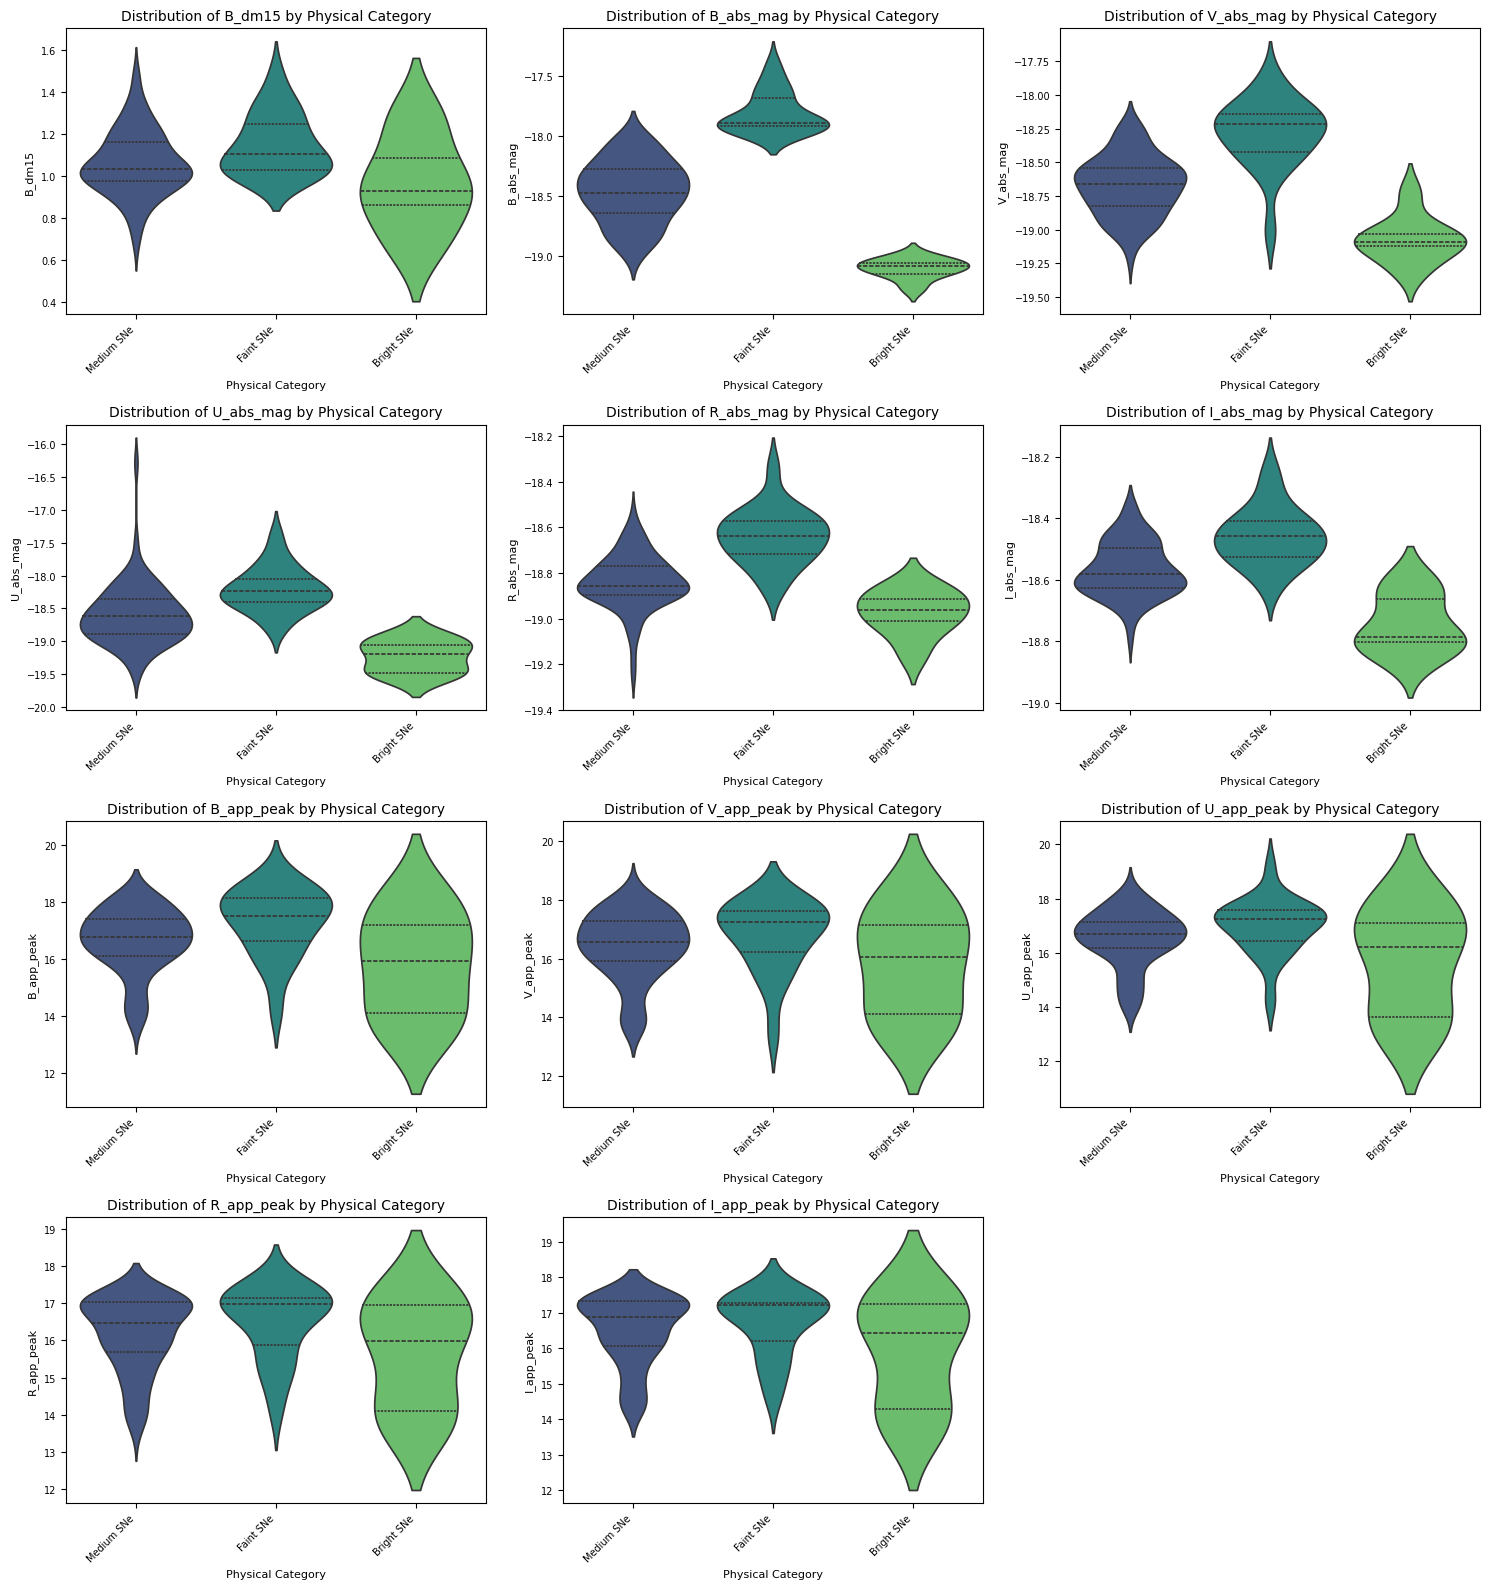


✅ All requested violin plots generated!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("🔄 Re-establishing dataframes and their derived columns...")

# --- 1. Re-load raw data ---
df = pd.read_excel('/content/cfa3_ubvri_cleaned.xlsx')

# --- 2. Re-create df_imputed_knn (full imputation) ---
# Identify all numeric columns in the df DataFrame for full imputation
numeric_cols_for_full_imputation = df.select_dtypes(include=[np.number]).columns.tolist()
imputer_knn_full = KNNImputer(n_neighbors=5, weights='distance')
df_imputed_knn = pd.DataFrame(
    imputer_knn_full.fit_transform(df[numeric_cols_for_full_imputation]),
    columns=numeric_cols_for_full_imputation,
    index=df.index
)
print(f"✅ df_imputed_knn created with shape: {df_imputed_knn.shape}")

# --- 3. Re-create df_clustering_data_imputed (2-cluster Spectral Clustering and B_abs_mag_predicted) ---
df_clustering_data_imputed = df_imputed_knn.copy()

# Define the formula coefficients (from previous cells)
coeff_a = -0.0585
coeff_b = 0.9776

df_clustering_data_imputed['B_abs_mag_predicted'] = (coeff_a * (-np.log(df_clustering_data_imputed['B_dm15']))) + \
                                                   (coeff_b * df_clustering_data_imputed['V_abs_mag'])

X_imputed = df_clustering_data_imputed[['B_dm15', 'B_abs_mag_predicted']].values

spectral_clustering_imputed = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=42)
clusters_imputed = spectral_clustering_imputed.fit_predict(X_imputed)
df_clustering_data_imputed['Spectral_Cluster'] = clusters_imputed
print(f"✅ df_clustering_data_imputed created with shape: {df_clustering_data_imputed.shape}")

# --- 4. Re-create df_clustering_data_cleaned (outlier removal, scaling, 2-cluster) ---
df_clustering_data_cleaned = df_clustering_data_imputed.copy()

features_for_outlier_detection = ['B_dm15', 'B_abs_mag_predicted']
for col in features_for_outlier_detection:
    Q1 = df_clustering_data_cleaned[col].quantile(0.25)
    Q3 = df_clustering_data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clustering_data_cleaned = df_clustering_data_cleaned[
        (df_clustering_data_cleaned[col] >= lower_bound) &
        (df_clustering_data_cleaned[col] <= upper_bound)
    ]

# Recalculate predicted B_abs_mag for the cleaned data
df_clustering_data_cleaned['B_abs_mag_predicted'] = (coeff_a * (-np.log(df_clustering_data_cleaned['B_dm15']))) + \
                                                     (coeff_b * df_clustering_data_cleaned['V_abs_mag'])

X_cleaned_raw = df_clustering_data_cleaned[['B_dm15', 'B_abs_mag_predicted']].values
scaler = StandardScaler()
X_cleaned = scaler.fit_transform(X_cleaned_raw)

spectral_clustering_cleaned = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='discretize', random_state=42)
clusters_cleaned = spectral_clustering_cleaned.fit_predict(X_cleaned)
df_clustering_data_cleaned['Spectral_Cluster'] = clusters_cleaned

# Add the 2-way physical category
df_clustering_data_cleaned['Physical_Category'] = df_clustering_data_cleaned['B_dm15'].apply(lambda x: '< 1.1' if x < 1.1 else '>= 1.1')
print(f"✅ df_clustering_data_cleaned created with shape: {df_clustering_data_cleaned.shape}")

# --- 5. Add 3-cluster Spectral Clustering and 3-Way Physical Category ---
# Use the same scaled features X_cleaned for 3-cluster Spectral Clustering
spectral_clustering_3_clusters = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='discretize', random_state=42)
clusters_3 = spectral_clustering_3_clusters.fit_predict(X_cleaned)
df_clustering_data_cleaned['Spectral_Cluster_3'] = clusters_3

# Define 3-Way Physical Categories based on B_abs_mag
# These thresholds are determined for SN Ia (e.g., from literature or data distribution)
# Example thresholds, adjust if specific ones are required from a previous context
threshold_bright = -19.0
threshold_faint = -18.0

def categorize_sn_3way(b_abs_mag):
    if b_abs_mag <= threshold_bright:
        return 'Bright SNe'
    elif b_abs_mag >= threshold_faint:
        return 'Faint SNe'
    else:
        return 'Medium SNe'

df_clustering_data_cleaned['Physical_Category_3Way'] = df_clustering_data_cleaned['B_abs_mag'].apply(categorize_sn_3way)
print(f"✅ 3-cluster Spectral Clustering and 'Physical_Category_3Way' added to df_clustering_data_cleaned.")

print("\n📊 Generating violin plots for key parameters grouped by Physical_Category_3Way...")

# Parameters to plot
params_for_violin_plots = [
    'B_dm15',
    'B_abs_mag', 'V_abs_mag', 'U_abs_mag', 'R_abs_mag', 'I_abs_mag', # Absolute Magnitudes
    'B_app_peak', 'V_app_peak', 'U_app_peak', 'R_app_peak', 'I_app_peak'  # Apparent Magnitudes
]

# Filter to include only columns present in the dataframe
existing_params_for_violin_plots = [p for p in params_for_violin_plots if p in df_clustering_data_cleaned.columns]

# Create violin plots
n_cols = 3 # Number of columns for subplots
n_rows = (len(existing_params_for_violin_plots) + n_cols - 1) // n_cols # Calculate rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, param in enumerate(existing_params_for_violin_plots):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.violinplot(data=df_clustering_data_cleaned, x='Physical_Category_3Way', y=param, palette='viridis', inner='quartile')
    plt.title(f'Distribution of {param} by Physical Category', fontsize=10)
    plt.xlabel('Physical Category', fontsize=8)
    plt.ylabel(param, fontsize=8)
    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()

print("\n✅ All requested violin plots generated!")